#**E-commerce Customer Segmentation**

##Abstract:
A key challenge for e-commerce businesses is to analyze the trend in the
market to increase their sales. The trend can be easily observed if the
companies can group the customers; based on their activity on the ecommerce site. This grouping can be done by applying different criteria like
previous orders, mostly searched brands and so on. 

##Problem Statement:
Given the e-commerce data, use k-means clustering algorithm to cluster
customers with similar interest. 
##Scope:


--> Analyzing the existing customer data and getting valuable insights
about the purchase pattern

--> Data pre-processing including missing value treatment

--> Segmenting customer based on the optimum number of clusters (‘k’)
with the help of silhouette score 


##Importing all required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight') #https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_excel('https://raw.githubusercontent.com/JOHANDILEEP21/Mini-Projects/main/cust_data.xlsx')
df

Cust_ID Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0            1      M       7       0         0        0     0     0   
1            2      F       0       0         1        0     0     0   
2            3      M       7       0         1        0     0     0   
3            4      F       0       0         0        0     0     0   
4            5    NaN      10       0         0        0     0     0   
...        ...    ...     ...     ...       ...      ...   ...   ...   
29995    29996      M       0       0         0        0     0     0   
29996    29997      M       1       0         1        0     0     0   
29997    29998      M       0       0         1        0     0     0   
29998    29999      M       0       0         0        0     0     0   
29999    30000      F       3       2         0        0     1     0   

       Mondelez International  Wrangler  ...  LG  Dior  Scabal  \
0                           0         0  ...   0     0       0   
1                           0         0  ...   0     1       0   
2                           0         0  ...   0     0       0   
3                           0         0  ...   0     0       0   
4                           0         0  ...   0     0       2   
...                       ...       ...  ...  ..   ...     ...   
29995                       0         0  ...   0     0       0   
29996                       0         0  ...   0     0       0   
29997                       0         0  ...   0     0       0   
29998                       0         0  ...   0     0       0   
29999                       0         0  ...   0     0       0   

       Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  Jiffy mix  \
0                   0          0           0         0          0          0   
1                   0          0           0         0          0          0   
2                   0          0           0         0          1          0   
3                   0          0           0         0          0          0   
4                   0          0           0         0          0          1   
...               ...        ...         ...       ...        ...        ...   
29995               0          0           0         0          0          0   
29996               0          0           0         0          0          0   
29997               0          0           0         0          0          0   
29998               0          0           0         0          0          0   
29999               0          0           0         0          0          0   

       Kraft  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
29995      0  
29996      0  
29997      0  
29998      0  
29999      0  

[30000 rows x 38 columns]

In [3]:
df.shape

(30000, 38)

In [4]:
df.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [5]:
df.dtypes

Cust_ID                    int64
Gender                    object
Orders                     int64
Jordan                     int64
Gatorade                   int64
Samsung                    int64
Asus                       int64
Udis                       int64
Mondelez International     int64
Wrangler                   int64
Vans                       int64
Fila                       int64
Brooks                     int64
H&M                        int64
Dairy Queen                int64
Fendi                      int64
Hewlett Packard            int64
Pladis                     int64
Asics                      int64
Siemens                    int64
J.M. Smucker               int64
Pop Chips                  int64
Juniper                    int64
Huawei                     int64
Compaq                     int64
IBM                        int64
Burberry                   int64
Mi                         int64
LG                         int64
Dior                       int64
Scabal    

In [6]:
df = df.drop_duplicates()

In [7]:
df

Cust_ID Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0            1      M       7       0         0        0     0     0   
1            2      F       0       0         1        0     0     0   
2            3      M       7       0         1        0     0     0   
3            4      F       0       0         0        0     0     0   
4            5    NaN      10       0         0        0     0     0   
...        ...    ...     ...     ...       ...      ...   ...   ...   
29995    29996      M       0       0         0        0     0     0   
29996    29997      M       1       0         1        0     0     0   
29997    29998      M       0       0         1        0     0     0   
29998    29999      M       0       0         0        0     0     0   
29999    30000      F       3       2         0        0     1     0   

       Mondelez International  Wrangler  ...  LG  Dior  Scabal  \
0                           0         0  ...   0     0       0   
1                           0         0  ...   0     1       0   
2                           0         0  ...   0     0       0   
3                           0         0  ...   0     0       0   
4                           0         0  ...   0     0       2   
...                       ...       ...  ...  ..   ...     ...   
29995                       0         0  ...   0     0       0   
29996                       0         0  ...   0     0       0   
29997                       0         0  ...   0     0       0   
29998                       0         0  ...   0     0       0   
29999                       0         0  ...   0     0       0   

       Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  Jiffy mix  \
0                   0          0           0         0          0          0   
1                   0          0           0         0          0          0   
2                   0          0           0         0          1          0   
3                   0          0           0         0          0          0   
4                   0          0           0         0          0          1   
...               ...        ...         ...       ...        ...        ...   
29995               0          0           0         0          0          0   
29996               0          0           0         0          0          0   
29997               0          0           0         0          0          0   
29998               0          0           0         0          0          0   
29999               0          0           0         0          0          0   

       Kraft  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
29995      0  
29996      0  
29997      0  
29998      0  
29999      0  

[30000 rows x 38 columns]

###After dropping the duplicates the shape is same. so there's no duplicate values in the given dataset.

In [9]:
df.describe()

Cust_ID        Orders        Jordan      Gatorade       Samsung  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000      4.169800      0.267433      0.252333      0.222933   
std     8660.398374      3.590311      0.804778      0.705368      0.917494   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%     7500.750000      1.000000      0.000000      0.000000      0.000000   
50%    15000.500000      4.000000      0.000000      0.000000      0.000000   
75%    22500.250000      7.000000      0.000000      0.000000      0.000000   
max    30000.000000     12.000000     24.000000     15.000000     27.000000   

               Asus          Udis  Mondelez International      Wrangler  \
count  30000.000000  30000.000000            30000.000000  30000.000000   
mean       0.161333      0.143533                0.139767      0.106933   
std        0.740038      0.641258                0.525840      0.515921   
min        0.000000      0.000000                0.000000      0.000000   
25%        0.000000      0.000000                0.000000      0.000000   
50%        0.000000      0.000000                0.000000      0.000000   
75%        0.000000      0.000000                0.000000      0.000000   
max       17.000000     14.000000               31.000000      9.000000   

               Vans  ...            LG          Dior        Scabal  \
count  30000.000000  ...  30000.000000  30000.000000  30000.000000   
mean       0.111433  ...      0.102533      0.271133      0.370067   
std        0.547990  ...      0.486376      0.714682      0.758465   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        0.000000  ...      0.000000      0.000000      0.000000   
50%        0.000000  ...      0.000000      0.000000      0.000000   
75%        0.000000  ...      0.000000      0.000000      1.000000   
max       16.000000  ...     19.000000     12.000000     11.000000   

       Tommy Hilfiger     Hollister    Forever 21      Colavita     Microsoft  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean         0.158967      0.077667      0.057333      0.192200      0.116367   
std          0.510527      0.383370      0.300082      0.641306      0.446578   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%          0.000000      0.000000      0.000000      0.000000      0.000000   
50%          0.000000      0.000000      0.000000      0.000000      0.000000   
75%          0.000000      0.000000      0.000000      0.000000      0.000000   
max          8.000000      9.000000      8.000000     22.000000     14.000000   

          Jiffy mix         Kraft  
count  30000.000000  30000.000000  
mean       0.088033      0.070900  
std        0.399277      0.387915  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        8.000000     16.000000  

[8 rows x 37 columns]

In [10]:
df = df.apply(lambda x : x.fillna(x.value_counts().index[0]))
df

Cust_ID Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0            1      M       7       0         0        0     0     0   
1            2      F       0       0         1        0     0     0   
2            3      M       7       0         1        0     0     0   
3            4      F       0       0         0        0     0     0   
4            5      F      10       0         0        0     0     0   
...        ...    ...     ...     ...       ...      ...   ...   ...   
29995    29996      M       0       0         0        0     0     0   
29996    29997      M       1       0         1        0     0     0   
29997    29998      M       0       0         1        0     0     0   
29998    29999      M       0       0         0        0     0     0   
29999    30000      F       3       2         0        0     1     0   

       Mondelez International  Wrangler  ...  LG  Dior  Scabal  \
0                           0         0  ...   0     0       0   
1                           0         0  ...   0     1       0   
2                           0         0  ...   0     0       0   
3                           0         0  ...   0     0       0   
4                           0         0  ...   0     0       2   
...                       ...       ...  ...  ..   ...     ...   
29995                       0         0  ...   0     0       0   
29996                       0         0  ...   0     0       0   
29997                       0         0  ...   0     0       0   
29998                       0         0  ...   0     0       0   
29999                       0         0  ...   0     0       0   

       Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  Jiffy mix  \
0                   0          0           0         0          0          0   
1                   0          0           0         0          0          0   
2                   0          0           0         0          1          0   
3                   0          0           0         0          0          0   
4                   0          0           0         0          0          1   
...               ...        ...         ...       ...        ...        ...   
29995               0          0           0         0          0          0   
29996               0          0           0         0          0          0   
29997               0          0           0         0          0          0   
29998               0          0           0         0          0          0   
29999               0          0           0         0          0          0   

       Kraft  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
29995      0  
29996      0  
29997      0  
29998      0  
29999      0  

[30000 rows x 38 columns]

In [11]:
df['Gender'].value_counts()

F    24778
M     5222
Name: Gender, dtype: int64

In gender column null values is 2724. In total no of gender colums, the percentage of male is around 80%, and female is 20%. So we can go with 80-20 for male and female.

In [12]:
df["Gender"]=df["Gender"].fillna(value="M",limit=545)
df["Gender"]=df["Gender"].fillna(value="F",limit=2179)

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

Cust_ID  Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0        1       1       7       0         0        0     0     0   
1        2       0       0       0         1        0     0     0   
2        3       1       7       0         1        0     0     0   
3        4       0       0       0         0        0     0     0   
4        5       0      10       0         0        0     0     0   

   Mondelez International  Wrangler  ...  LG  Dior  Scabal  Tommy Hilfiger  \
0                       0         0  ...   0     0       0               0   
1                       0         0  ...   0     1       0               0   
2                       0         0  ...   0     0       0               0   
3                       0         0  ...   0     0       0               0   
4                       0         0  ...   0     0       2               0   

   Hollister  Forever 21  Colavita  Microsoft  Jiffy mix  Kraft  
0          0           0         0          0          0      0  
1          0           0         0          0          0      0  
2          0           0         0          1          0      0  
3          0           0         0          0          0      0  
4          0           0         0          0          1      1  

[5 rows x 38 columns]

In [14]:
df['Gender'].value_counts()

0    24778
1     5222
Name: Gender, dtype: int64

## EDA

In [17]:
df.columns, len(df.columns)

(Index(['Cust_ID', 'Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus',
        'Udis', 'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks',
        'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics',
        'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq',
        'IBM', 'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger',
        'Hollister', 'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix',
        'Kraft'],
       dtype='object'),
 38)

In [21]:
dfs = df.drop(['Cust_ID', 'Gender'], axis=1)
dfs.head()

Orders  Jordan  Gatorade  Samsung  Asus  Udis  Mondelez International  \
0       7       0         0        0     0     0                       0   
1       0       0         1        0     0     0                       0   
2       7       0         1        0     0     0                       0   
3       0       0         0        0     0     0                       0   
4      10       0         0        0     0     0                       0   

   Wrangler  Vans  Fila  ...  LG  Dior  Scabal  Tommy Hilfiger  Hollister  \
0         0     2     0  ...   0     0       0               0          0   
1         0     0     0  ...   0     1       0               0          0   
2         0     0     0  ...   0     0       0               0          0   
3         0     0     0  ...   0     0       0               0          0   
4         0     0     0  ...   0     0       2               0          0   

   Forever 21  Colavita  Microsoft  Jiffy mix  Kraft  
0           0         0          0          0      0  
1           0         0          0          0      0  
2           0         0          1          0      0  
3           0         0          0          0      0  
4           0         0          0          1      1  

[5 rows x 36 columns]

In [30]:
df.columns[2:]

Index(['Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft'],
      dtype='object')

2 Orders
3 Jordan
4 Gatorade
5 Samsung
6 Asus
7 Udis


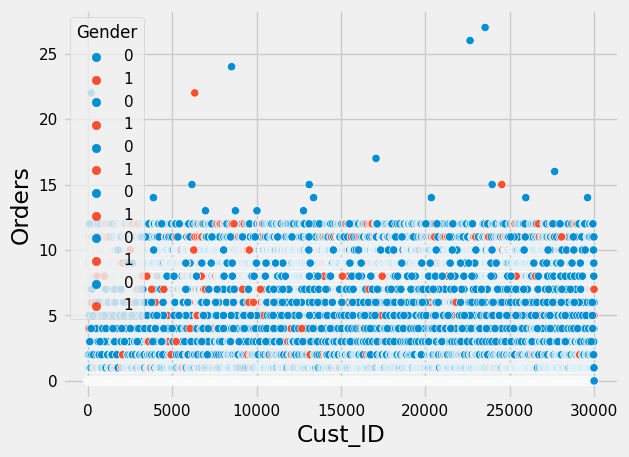

In [51]:
for i in range(2, len(df.columns)-30):
  print(i, df.columns[i])
  sns.scatterplot(data=df, x='Cust_ID', y=df.columns[i], hue='Gender')

<Axes: xlabel='Cust_ID', ylabel='Orders'>

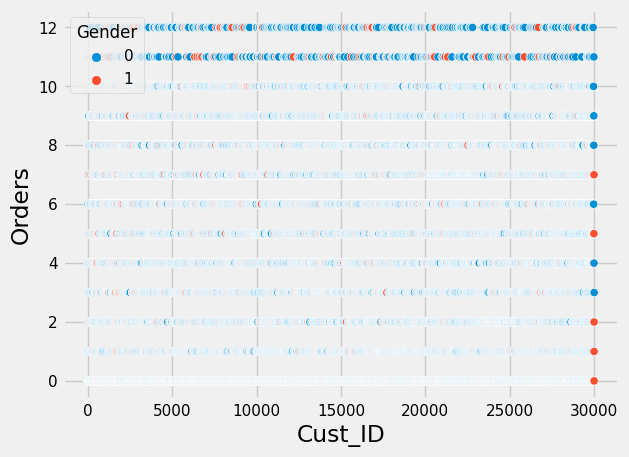

In [38]:
sns.scatterplot(data=df, x='Cust_ID', y='Orders', hue='Gender')

<Axes: xlabel='Cust_ID', ylabel='Jordan'>

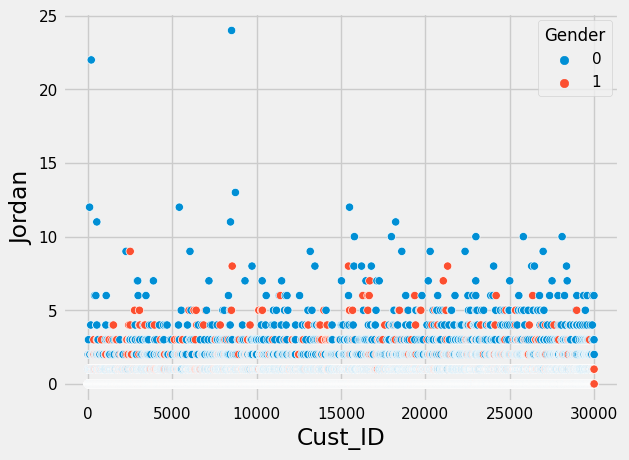

In [39]:
sns.scatterplot(data=df, x='Cust_ID', y='Jordan', hue='Gender')

<Axes: xlabel='Cust_ID', ylabel='Gatorade'>

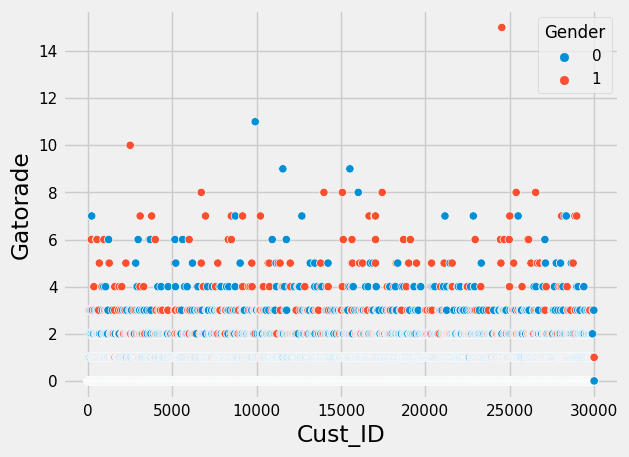

In [42]:
sns.scatterplot(data=df, x='Cust_ID', y='Gatorade', hue='Gender')

<Axes: xlabel='Cust_ID', ylabel='Samsung'>

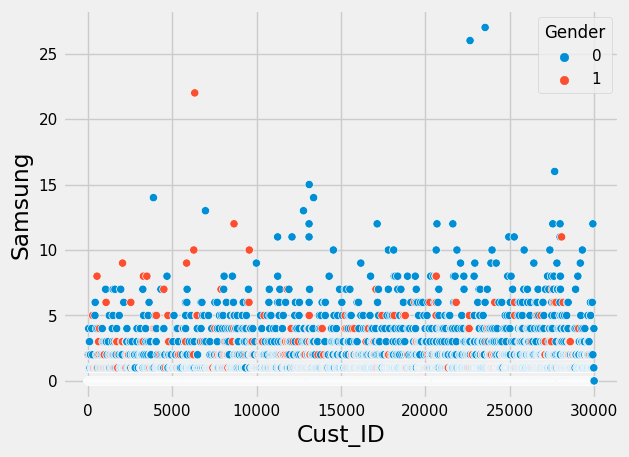

In [43]:
sns.scatterplot(data=df, x='Cust_ID', y=df.columns[5], hue='Gender')

<Axes: xlabel='Cust_ID', ylabel='Asus'>

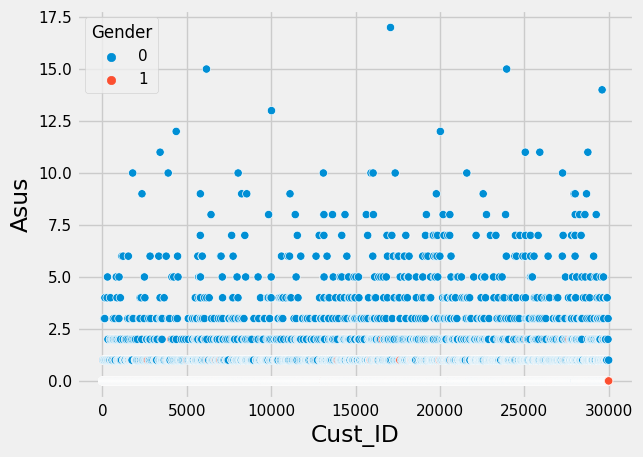

In [44]:
sns.scatterplot(data=df, x='Cust_ID', y=df.columns[6], hue='Gender')

<Axes: xlabel='Cust_ID', ylabel='Udis'>

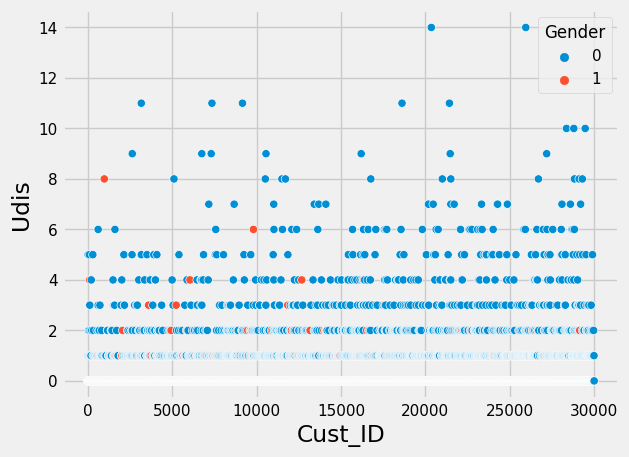

In [45]:
sns.scatterplot(data=df, x='Cust_ID', y=df.columns[7], hue='Gender')

<Axes: xlabel='Cust_ID', ylabel='Mondelez International'>

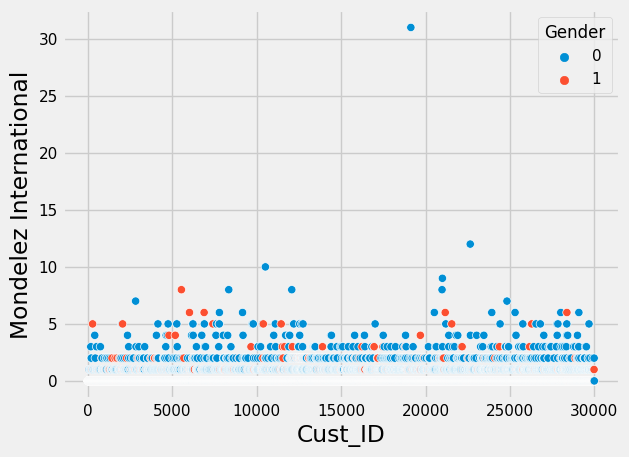

In [52]:
sns.scatterplot(data=df, x='Cust_ID', y=df.columns[8], hue='Gender')

<Axes: xlabel='Cust_ID', ylabel='Wrangler'>

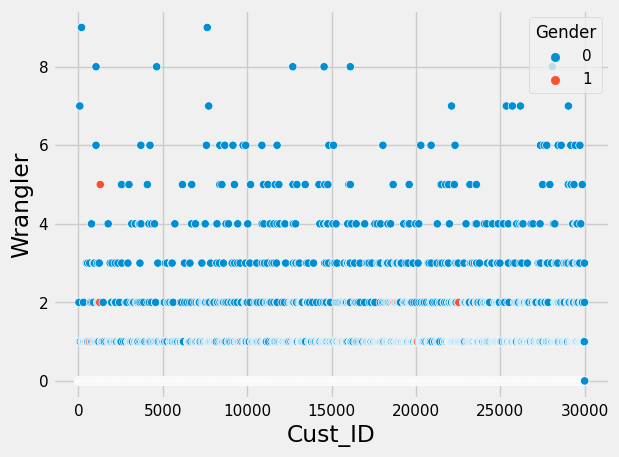

In [53]:
sns.scatterplot(data=df, x='Cust_ID', y=df.columns[9], hue='Gender')

<Axes: xlabel='Cust_ID', ylabel='Vans'>

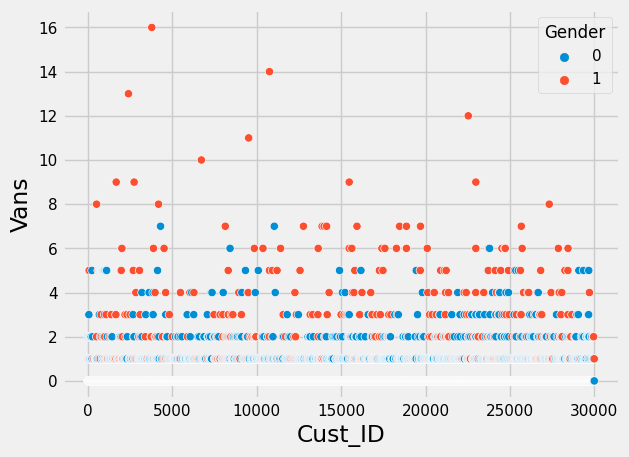

In [54]:
sns.scatterplot(data=df, x='Cust_ID', y=df.columns[10], hue='Gender')

<Axes: xlabel='Cust_ID', ylabel='Fila'>

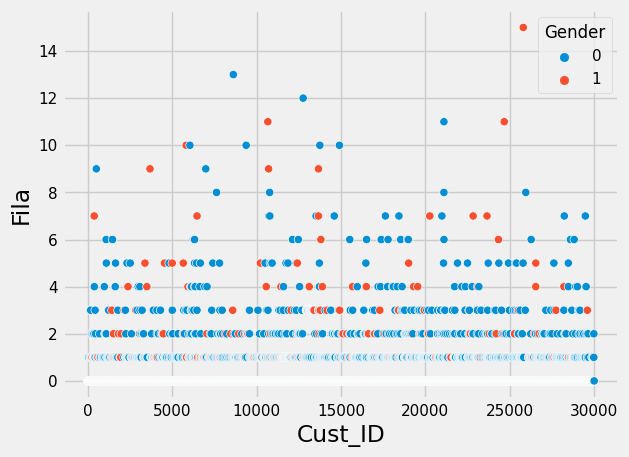

In [56]:
sns.scatterplot(data=df, x='Cust_ID', y=df.columns[11], hue='Gender')

<Axes: xlabel='Cust_ID', ylabel='Brooks'>

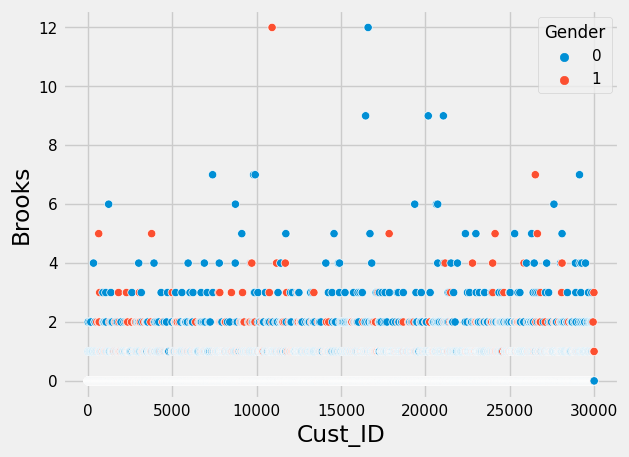

In [57]:
sns.scatterplot(data=df, x='Cust_ID', y=df.columns[12], hue='Gender')

<Axes: xlabel='Cust_ID', ylabel='H&M'>

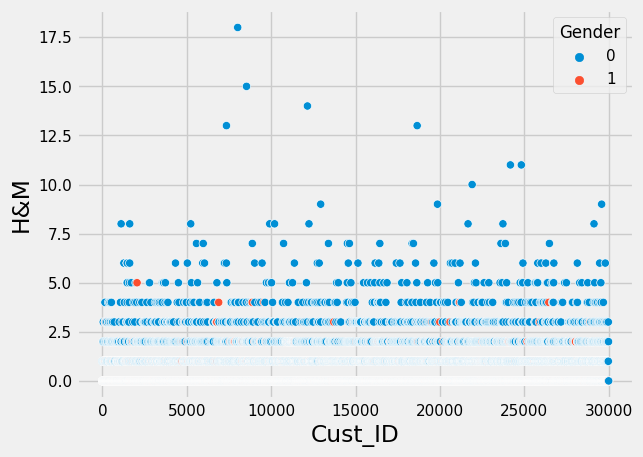

In [58]:
sns.scatterplot(data=df, x='Cust_ID', y=df.columns[13], hue='Gender')

<Axes: xlabel='Cust_ID', ylabel='Dairy Queen'>

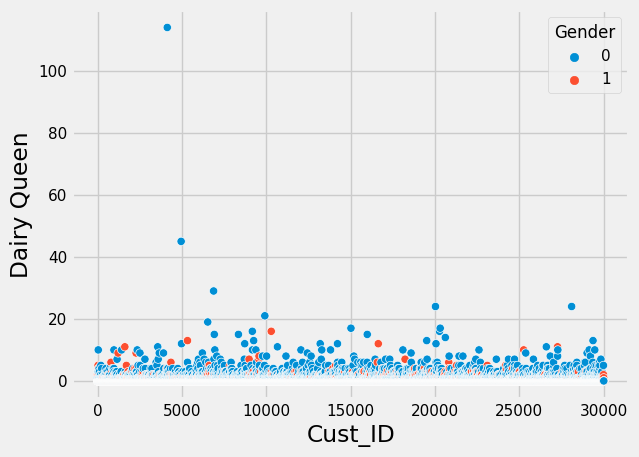

In [59]:
sns.scatterplot(data=df, x='Cust_ID', y=df.columns[14], hue='Gender')

<Axes: xlabel='Cust_ID', ylabel='Fendi'>

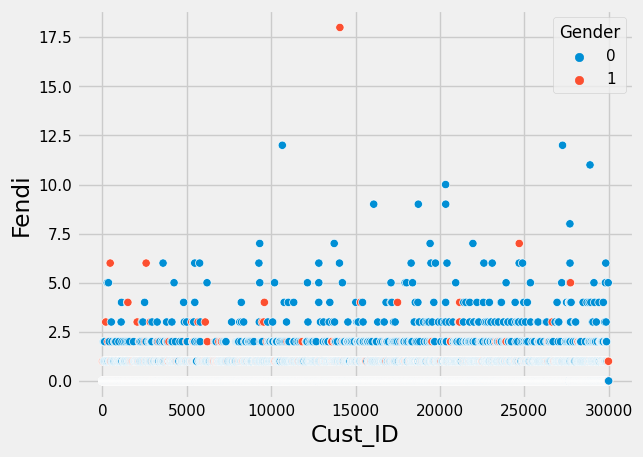

In [60]:
sns.scatterplot(data=df, x='Cust_ID', y=df.columns[15], hue='Gender')

<Axes: xlabel='Cust_ID', ylabel='Hewlett Packard'>

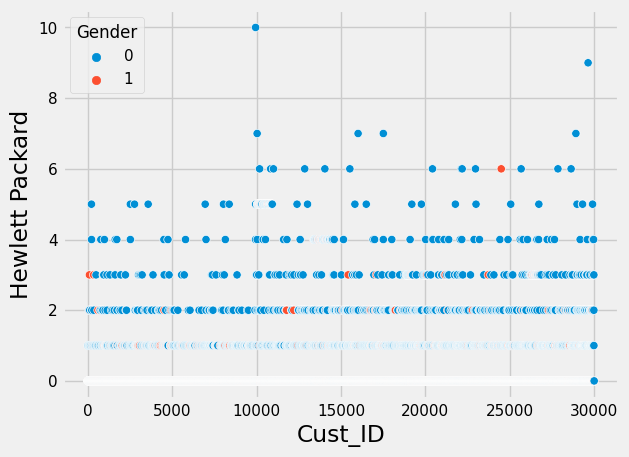

In [61]:
sns.scatterplot(data=df, x='Cust_ID', y=df.columns[16], hue='Gender')

<Axes: xlabel='Cust_ID', ylabel='Pladis'>

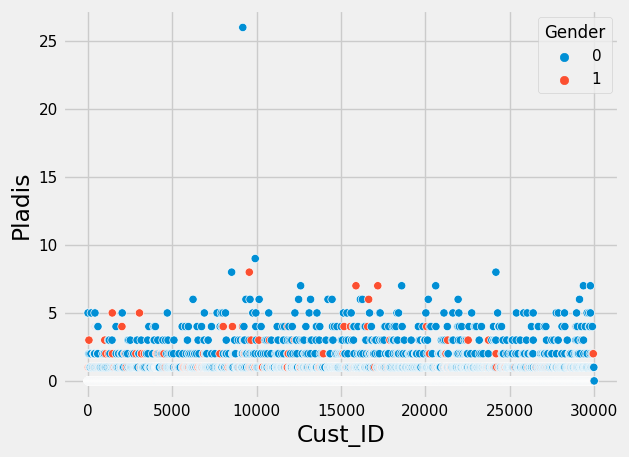

In [62]:
sns.scatterplot(data=df, x='Cust_ID', y=df.columns[17], hue='Gender')

<Axes: xlabel='Cust_ID', ylabel='Asics'>

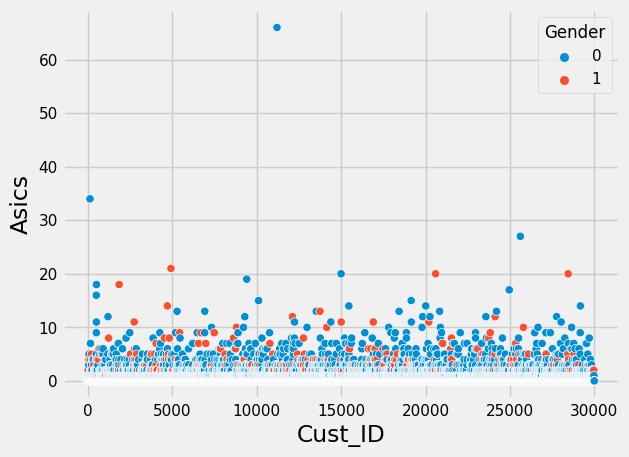

In [63]:
sns.scatterplot(data=df, x='Cust_ID', y=df.columns[18], hue='Gender')

<Axes: xlabel='Cust_ID', ylabel='Siemens'>

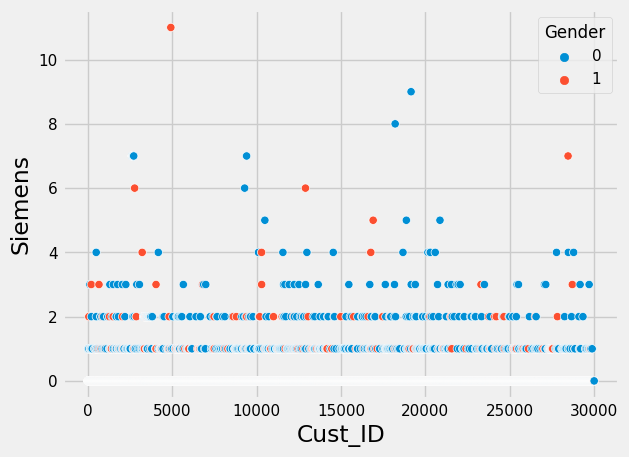

In [64]:
sns.scatterplot(data=df, x='Cust_ID', y=df.columns[19], hue='Gender')

<Axes: xlabel='Cust_ID', ylabel='J.M. Smucker'>

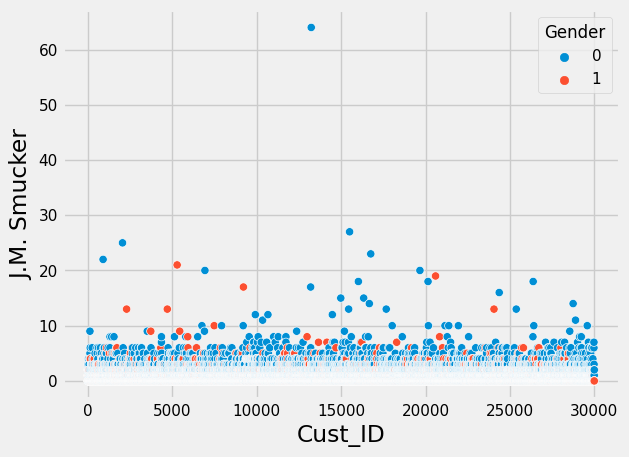

In [65]:
sns.scatterplot(data=df, x='Cust_ID', y=df.columns[20], hue='Gender')

<Axes: xlabel='Cust_ID', ylabel='Pop Chips'>

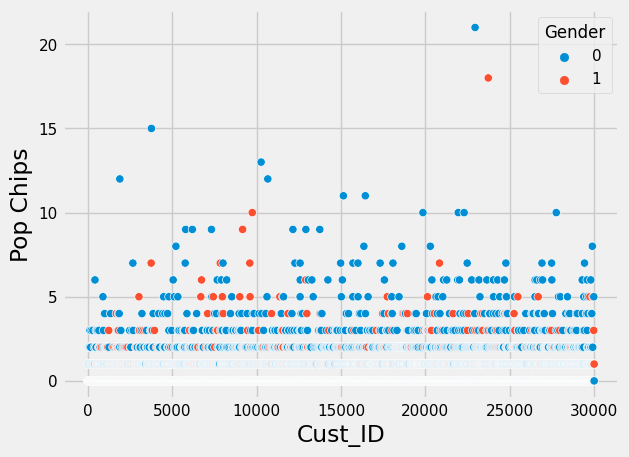

In [66]:
sns.scatterplot(data=df, x='Cust_ID', y=df.columns[21], hue='Gender')

<Axes: xlabel='Cust_ID', ylabel='Juniper'>

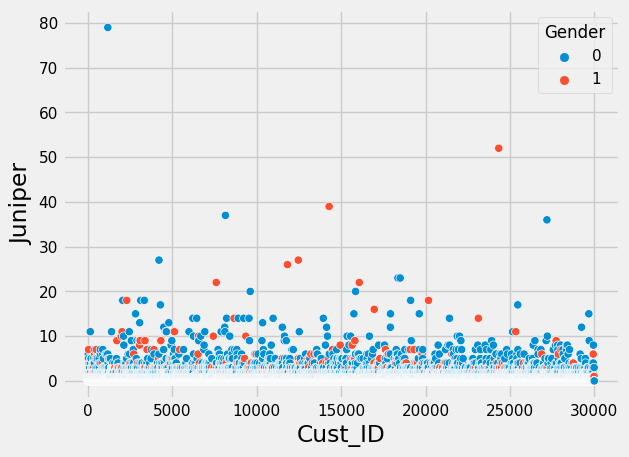

In [67]:
sns.scatterplot(data=df, x='Cust_ID', y=df.columns[22], hue='Gender')

<Axes: xlabel='Cust_ID', ylabel='Huawei'>

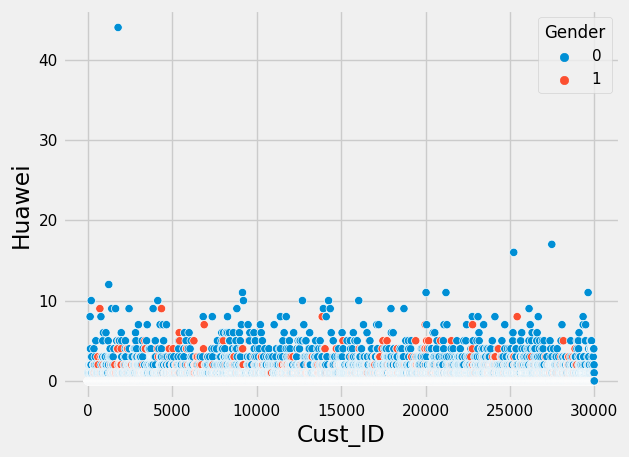

In [68]:
sns.scatterplot(data=df, x='Cust_ID', y=df.columns[23], hue='Gender')

<Axes: xlabel='Cust_ID', ylabel='Compaq'>

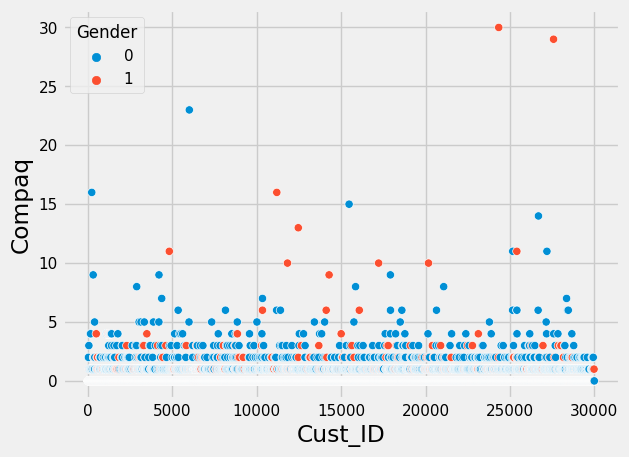

In [69]:
sns.scatterplot(data=df, x='Cust_ID', y=df.columns[24], hue='Gender')

<Axes: xlabel='Cust_ID', ylabel='IBM'>

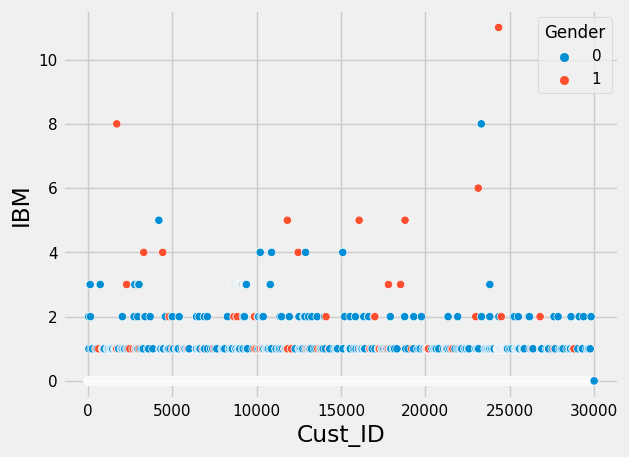

In [70]:
sns.scatterplot(data=df, x='Cust_ID', y=df.columns[25], hue='Gender')

<Axes: xlabel='Cust_ID', ylabel='Burberry'>

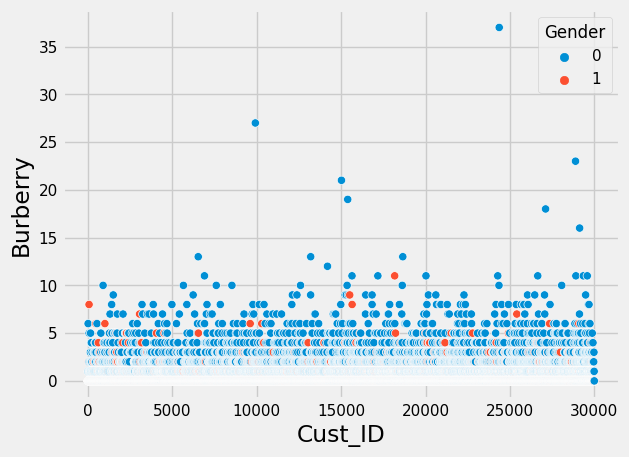

In [71]:
sns.scatterplot(data=df, x='Cust_ID', y=df.columns[26], hue='Gender')

<Axes: xlabel='Cust_ID', ylabel='Mi'>

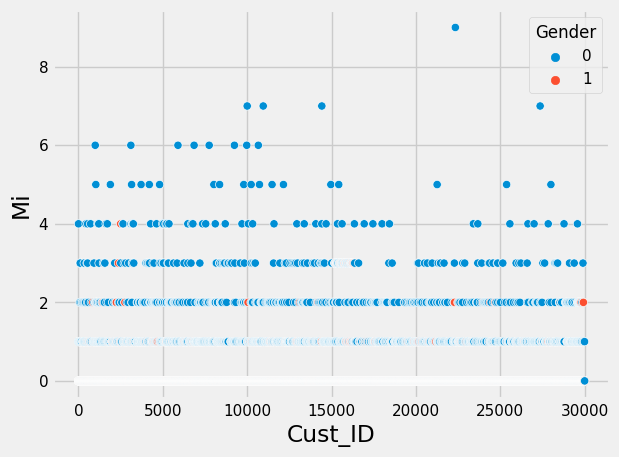

In [72]:
sns.scatterplot(data=df, x='Cust_ID', y=df.columns[27], hue='Gender')

<Axes: xlabel='Cust_ID', ylabel='LG'>

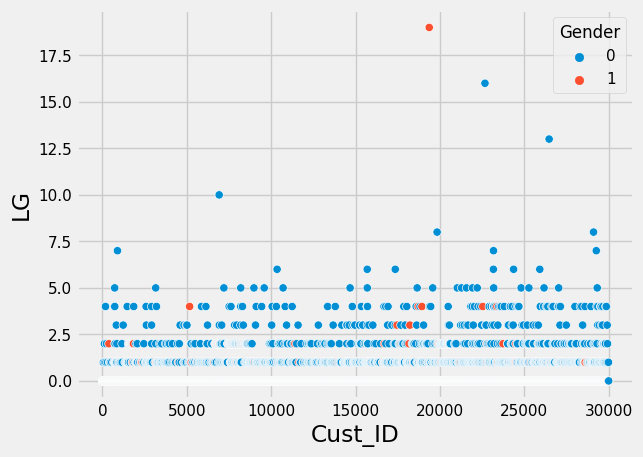

In [73]:
sns.scatterplot(data=df, x='Cust_ID', y=df.columns[28], hue='Gender')

<Axes: xlabel='Cust_ID', ylabel='Dior'>

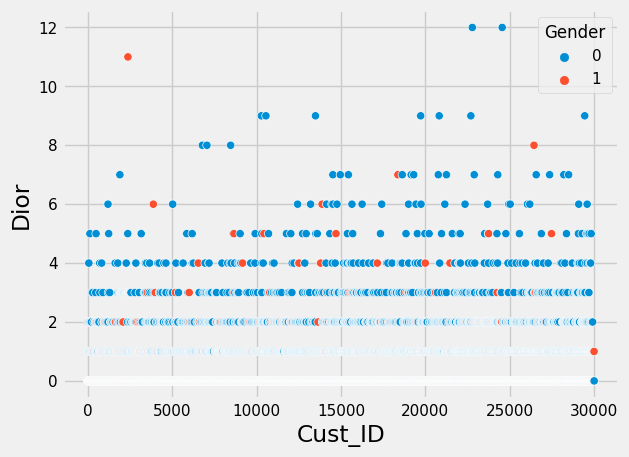

In [74]:
sns.scatterplot(data=df, x='Cust_ID', y=df.columns[29], hue='Gender')

<Axes: xlabel='Cust_ID', ylabel='Scabal'>

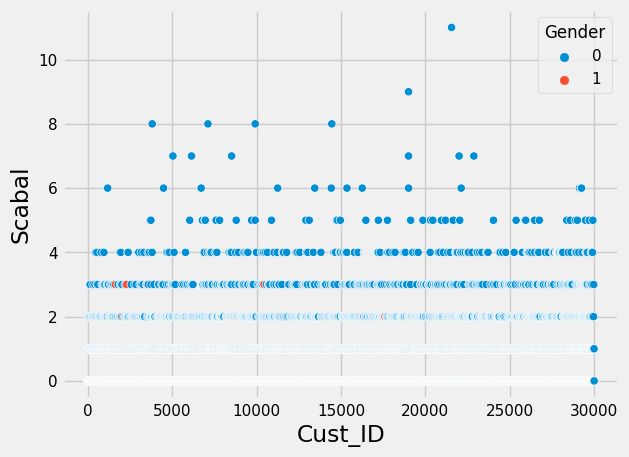

In [75]:
sns.scatterplot(data=df, x='Cust_ID', y=df.columns[30], hue='Gender')

<Axes: xlabel='Cust_ID', ylabel='Tommy Hilfiger'>

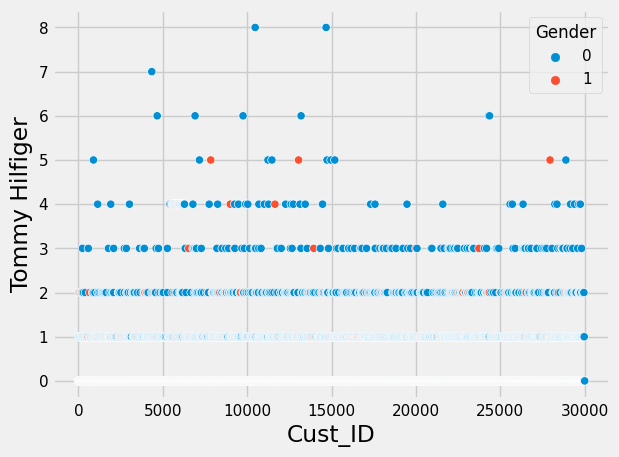

In [76]:
sns.scatterplot(data=df, x='Cust_ID', y=df.columns[31], hue='Gender')

<Axes: xlabel='Cust_ID', ylabel='Hollister'>

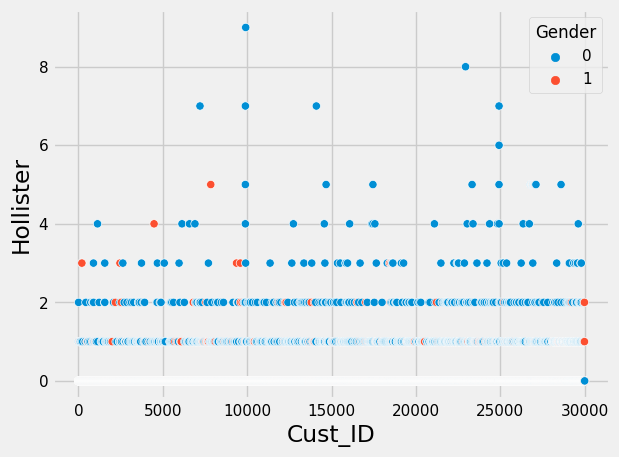

In [77]:
sns.scatterplot(data=df, x='Cust_ID', y=df.columns[32], hue='Gender')

<Axes: xlabel='Cust_ID', ylabel='Forever 21'>

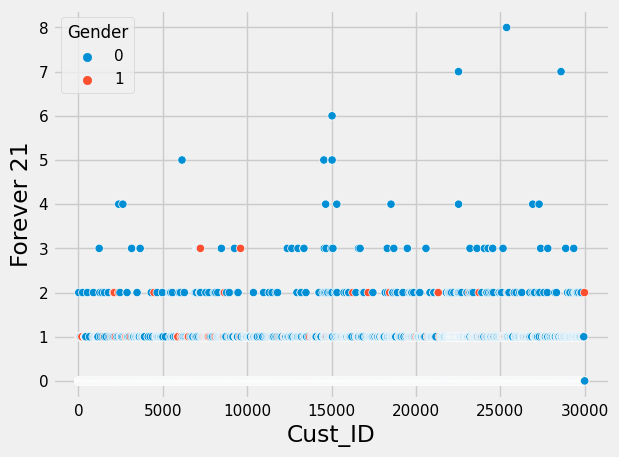

In [78]:
sns.scatterplot(data=df, x='Cust_ID', y=df.columns[33], hue='Gender')

<Axes: xlabel='Cust_ID', ylabel='Colavita'>

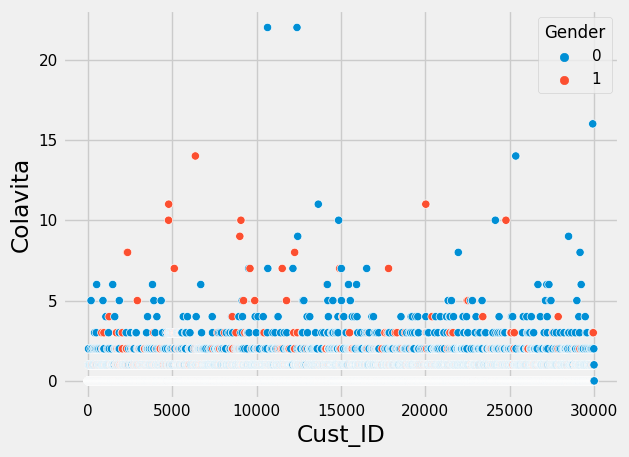

In [81]:
sns.scatterplot(data=df, x='Cust_ID', y=df.columns[34], hue='Gender')

<Axes: xlabel='Cust_ID', ylabel='Microsoft'>

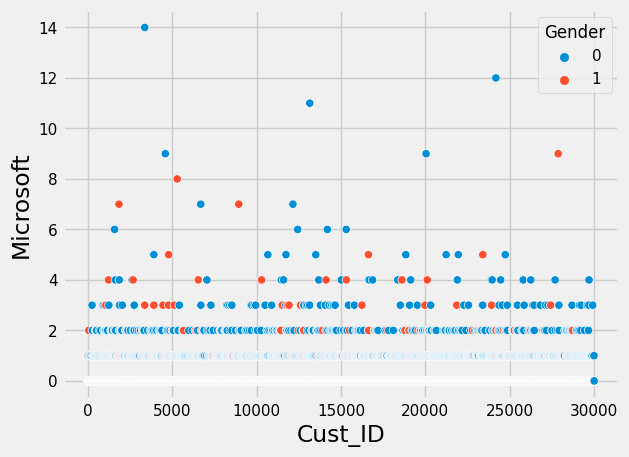

In [82]:
sns.scatterplot(data=df, x='Cust_ID', y=df.columns[35], hue='Gender')

<Axes: xlabel='Cust_ID', ylabel='Jiffy mix'>

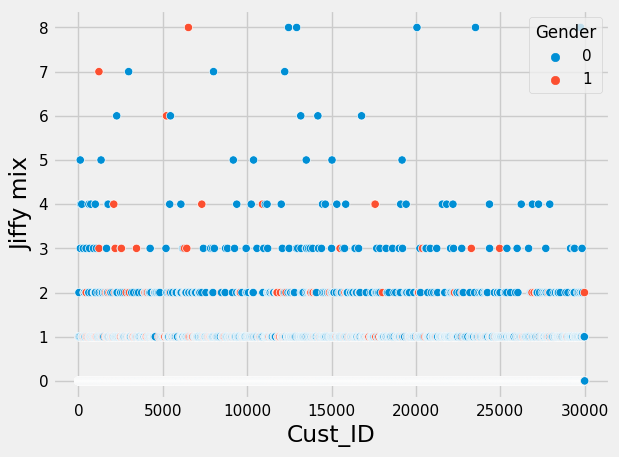

In [83]:
sns.scatterplot(data=df, x='Cust_ID', y=df.columns[36], hue='Gender')

<Axes: xlabel='Cust_ID', ylabel='Kraft'>

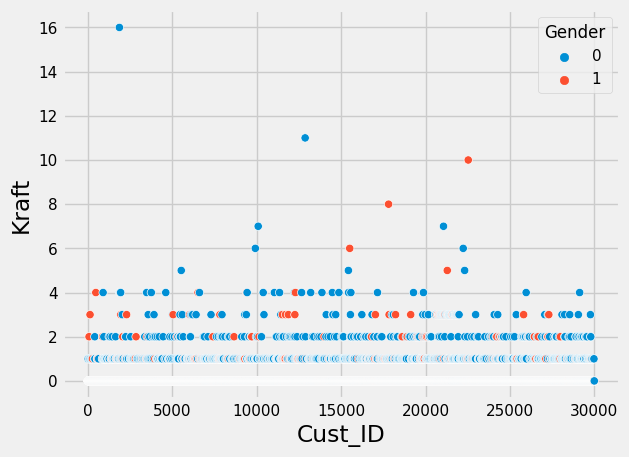

In [84]:
sns.scatterplot(data=df, x='Cust_ID', y=df.columns[37], hue='Gender')

## Deleting Customer ID

In [86]:
df = df.drop('Cust_ID', axis=1)

In [ ]:
df = pd.get_dummies(df, columns=['Gender'])

In [94]:
df.head()

Orders  Jordan  Gatorade  Samsung  Asus  Udis  Mondelez International  \
0       7       0         0        0     0     0                       0   
1       0       0         1        0     0     0                       0   
2       7       0         1        0     0     0                       0   
3       0       0         0        0     0     0                       0   
4      10       0         0        0     0     0                       0   

   Wrangler  Vans  Fila  ...  Scabal  Tommy Hilfiger  Hollister  Forever 21  \
0         0     2     0  ...       0               0          0           0   
1         0     0     0  ...       0               0          0           0   
2         0     0     0  ...       0               0          0           0   
3         0     0     0  ...       0               0          0           0   
4         0     0     0  ...       2               0          0           0   

   Colavita  Microsoft  Jiffy mix  Kraft  Gender_0  Gender_1  
0         0          0          0      0         0         1  
1         0          0          0      0         1         0  
2         0          1          0      0         0         1  
3         0          0          0      0         1         0  
4         0          0          1      1         1         0  

[5 rows x 38 columns]

In [90]:
#we create a df without Gender columns as their max(1.0) is equal to 1.0.
#after checking with the  description, we are about to clip the 0.99th percentie as outliers.
map_df = df.drop('Gender', axis=1)
def cap_data(df):
    for col in df.columns:
      percentiles = df[col].quantile([0.01, 0.99]).values
      df[col] = np.clip(df[col], percentiles[0], percentiles[1])  
      
    return df

final_df=cap_data(map_df)

In [95]:
#inserting back the gender columns

extracted_col1=df['Gender_0']
final_df.insert(1,'Gender_0' ,extracted_col1)


extracted_col2=df['Gender_1']
final_df.insert(1,'Gender_1' ,extracted_col2)
final_df.columns

Index(['Orders', 'Gender_1', 'Gender_0', 'Jordan', 'Gatorade', 'Samsung',
       'Asus', 'Udis', 'Mondelez International', 'Wrangler', 'Vans', 'Fila',
       'Brooks', 'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis',
       'Asics', 'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei',
       'Compaq', 'IBM', 'Burberry', 'Mi', 'LG', 'Dior', 'Scabal',
       'Tommy Hilfiger', 'Hollister', 'Forever 21', 'Colavita', 'Microsoft',
       'Jiffy mix', 'Kraft'],
      dtype='object')

In [96]:
final_df.describe()

Orders      Gender_1      Gender_0        Jordan      Gatorade  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean       4.169800      0.174067      0.825933      0.252933      0.236633   
std        3.590311      0.379173      0.379173      0.684086      0.602647   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      0.000000      1.000000      0.000000      0.000000   
50%        4.000000      0.000000      1.000000      0.000000      0.000000   
75%        7.000000      0.000000      1.000000      0.000000      0.000000   
max       12.000000      1.000000      1.000000      4.000000      3.000000   

            Samsung          Asus          Udis  Mondelez International  \
count  30000.000000  30000.000000  30000.000000            30000.000000   
mean       0.203533      0.143133      0.123667                0.125333   
std        0.737106      0.573693      0.471643                0.393400   
min        0.000000      0.000000      0.000000                0.000000   
25%        0.000000      0.000000      0.000000                0.000000   
50%        0.000000      0.000000      0.000000                0.000000   
75%        0.000000      0.000000      0.000000                0.000000   
max        5.000000      4.000000      3.000000                2.000000   

           Wrangler  ...            LG          Dior        Scabal  \
count  30000.000000  ...  30000.000000  30000.000000  30000.000000   
mean       0.096733  ...      0.087533      0.256233      0.366300   
std        0.424714  ...      0.354601      0.619024      0.733764   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        0.000000  ...      0.000000      0.000000      0.000000   
50%        0.000000  ...      0.000000      0.000000      0.000000   
75%        0.000000  ...      0.000000      0.000000      1.000000   
max        3.000000  ...      2.000000      3.000000      4.000000   

       Tommy Hilfiger     Hollister    Forever 21      Colavita     Microsoft  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean         0.144533      0.069133      0.045100      0.179767      0.106567   
std          0.421959      0.301480      0.207527      0.515874      0.358164   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%          0.000000      0.000000      0.000000      0.000000      0.000000   
50%          0.000000      0.000000      0.000000      0.000000      0.000000   
75%          0.000000      0.000000      0.000000      0.000000      0.000000   
max          2.000000      2.000000      1.000000      3.000000      2.000000   

          Jiffy mix        Kraft  
count  30000.000000  30000.00000  
mean       0.079833      0.06120  
std        0.324135      0.29381  
min        0.000000      0.00000  
25%        0.000000      0.00000  
50%        0.000000      0.00000  
75%        0.000000      0.00000  
max        2.000000      2.00000  

[8 rows x 38 columns]

## Model 1: K_means, Min max Normalisation, no outlier clipping, no cust_ID dropping

In [97]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_mM = scaler.fit_transform(df)

## Elbow plot
## We make a plot between k value and inertia

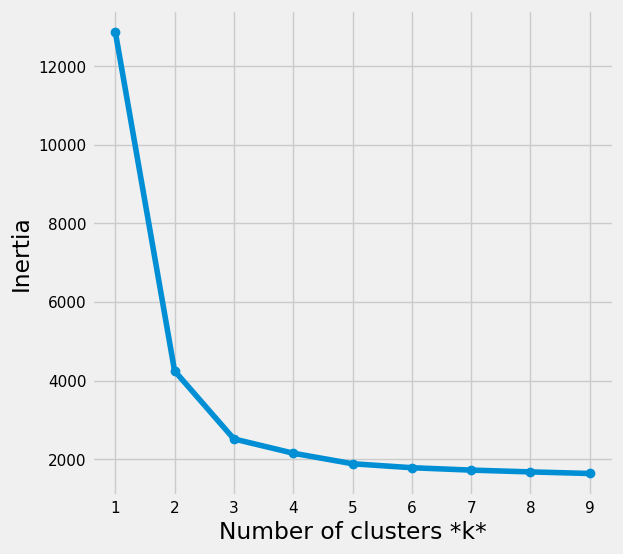

In [98]:
inertias = []  # storer inertia for all values of k 
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_mM)
    inertias.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Inertia');

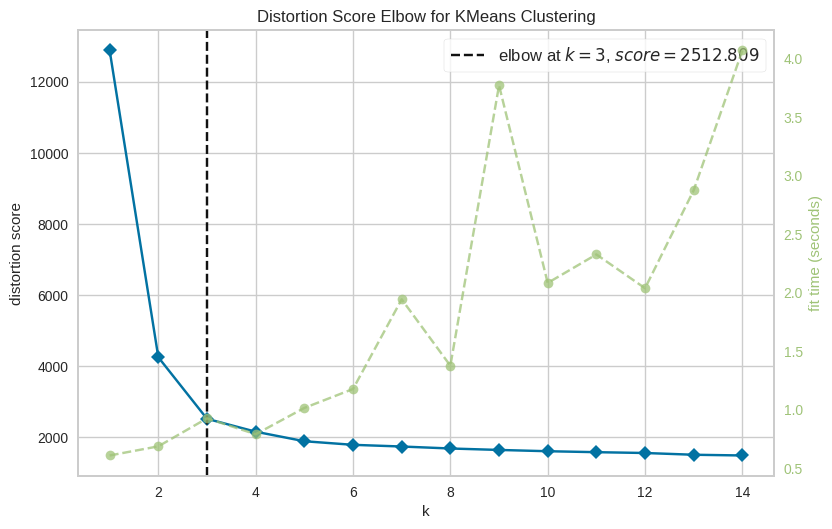

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [99]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
km = KMeans(random_state=42)

elb_visualizer = KElbowVisualizer(km, k=(1,15))
elb_visualizer.fit(X_mM)    
elb_visualizer.show()

In [100]:
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = range(2,15)
sil=[]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X_mM)
    silhouette_avg = silhouette_score(X_mM, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sil.append(silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.6825198456155787
For n_clusters = 3 The average silhouette_score is : 0.47325838767801276
For n_clusters = 4 The average silhouette_score is : 0.43357507509623244
For n_clusters = 5 The average silhouette_score is : 0.31689243333133504
For n_clusters = 6 The average silhouette_score is : 0.2486162261858636
For n_clusters = 7 The average silhouette_score is : 0.2442922815030453
For n_clusters = 8 The average silhouette_score is : 0.2252519904257798
For n_clusters = 9 The average silhouette_score is : 0.18833497904289384
For n_clusters = 10 The average silhouette_score is : 0.19196287737056733
For n_clusters = 11 The average silhouette_score is : 0.22751063657633253
For n_clusters = 12 The average silhouette_score is : 0.23785551209848846
For n_clusters = 13 The average silhouette_score is : 0.17611709970104142
For n_clusters = 14 The average silhouette_score is : 0.2056853381113525


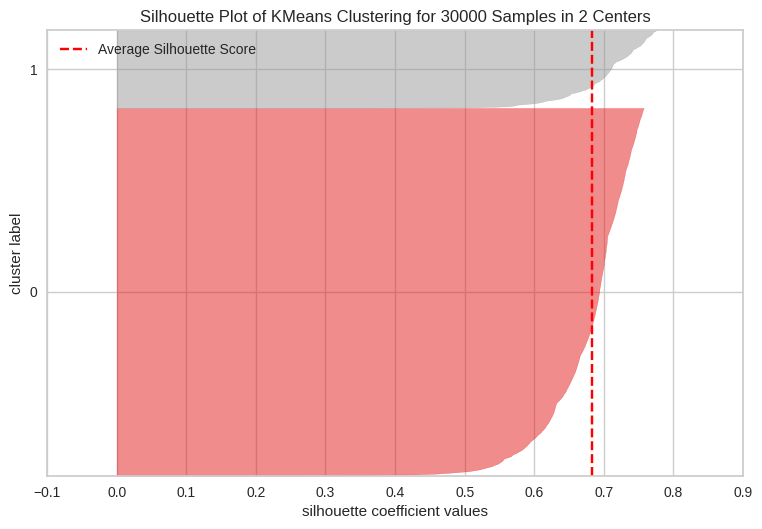

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 30000 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [101]:
minmax_2clust = KMeans(n_clusters = 2)

sil_visualizer = SilhouetteVisualizer(minmax_2clust)
sil_visualizer.fit(X_mM)    
sil_visualizer.show()

## Model 2: K_means, min max Normalisation,no outlier clipping ,Cust_Id dropped

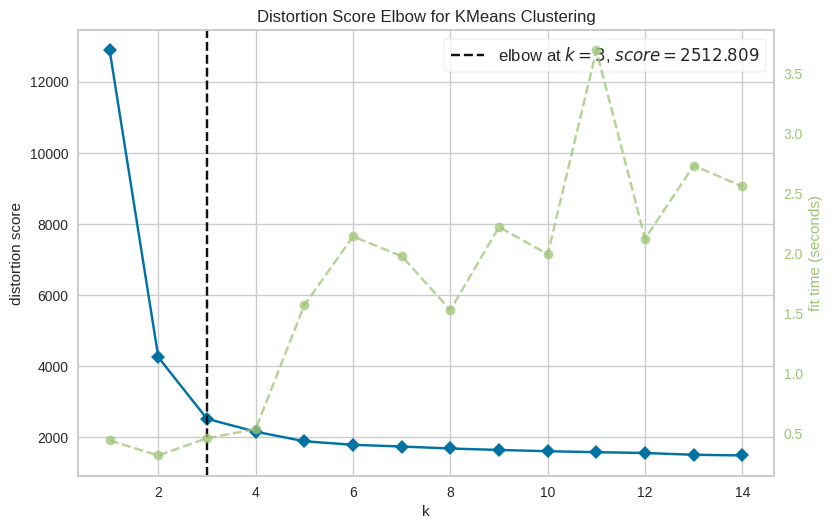

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [102]:
elb_visualizer = KElbowVisualizer(km, k=(1,15))
elb_visualizer.fit(X_mM)    
elb_visualizer.show()

In [103]:
for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters)
  cluster_labels = clusterer.fit_predict(X_mM)
  silhouette_avg = silhouette_score(X_mM, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)
  sil.append(silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.6825198456155787
For n_clusters = 3 The average silhouette_score is : 0.47325838767801276
For n_clusters = 4 The average silhouette_score is : 0.43357507509623244
For n_clusters = 5 The average silhouette_score is : 0.31689243333133504
For n_clusters = 6 The average silhouette_score is : 0.2486162261858636
For n_clusters = 7 The average silhouette_score is : 0.22180727765236224
For n_clusters = 8 The average silhouette_score is : 0.24375648659915386
For n_clusters = 9 The average silhouette_score is : 0.18969354565820246
For n_clusters = 10 The average silhouette_score is : 0.18962339880219917
For n_clusters = 11 The average silhouette_score is : 0.1686951288143466
For n_clusters = 12 The average silhouette_score is : 0.19320433167500864
For n_clusters = 13 The average silhouette_score is : 0.1776043144386973
For n_clusters = 14 The average silhouette_score is : 0.17317163386116402


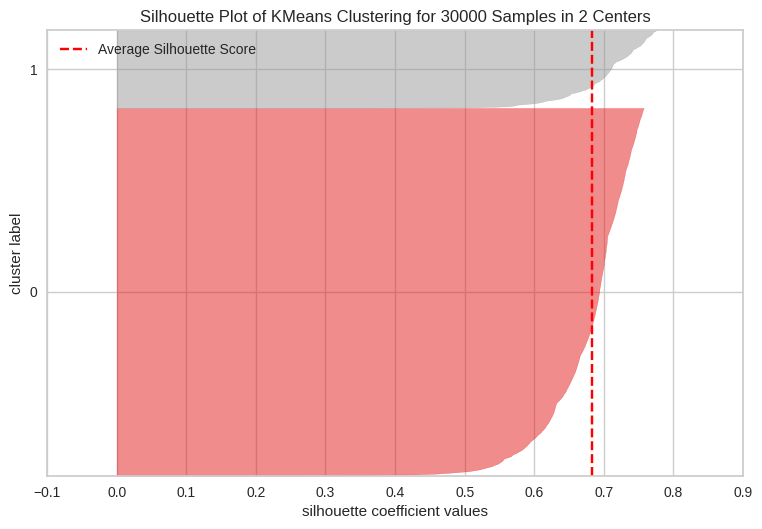

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 30000 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [104]:
minmax_2clust = KMeans(n_clusters = 2)

sil_visualizer = SilhouetteVisualizer(minmax_2clust)
sil_visualizer.fit(X_mM)    
sil_visualizer.show()

## Model 3: K _Means Standardisation, No elimination, outliers clipped, No dropping Cust_ID

In [105]:
X_std = scaler.fit_transform(final_df) # standardise data

Text(0, 0.5, 'Inertia')

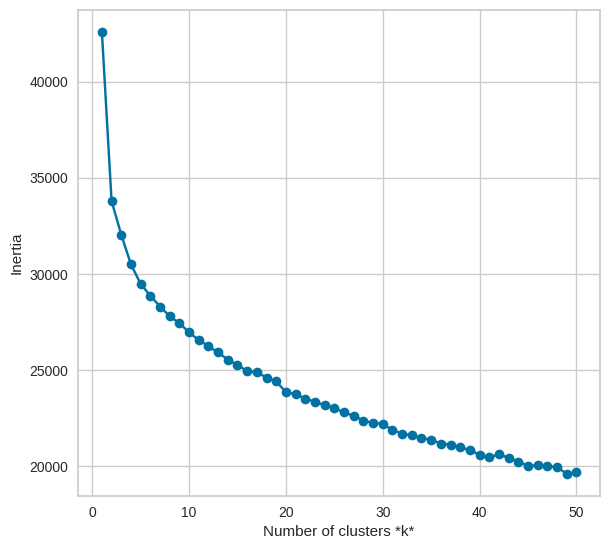

In [106]:
# Elbow plot
# We make a plot between k value and inertia
inertias = []  # storer inertia for all values of k 
list_k = list(range(1, 51))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_std)
    inertias.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Inertia')

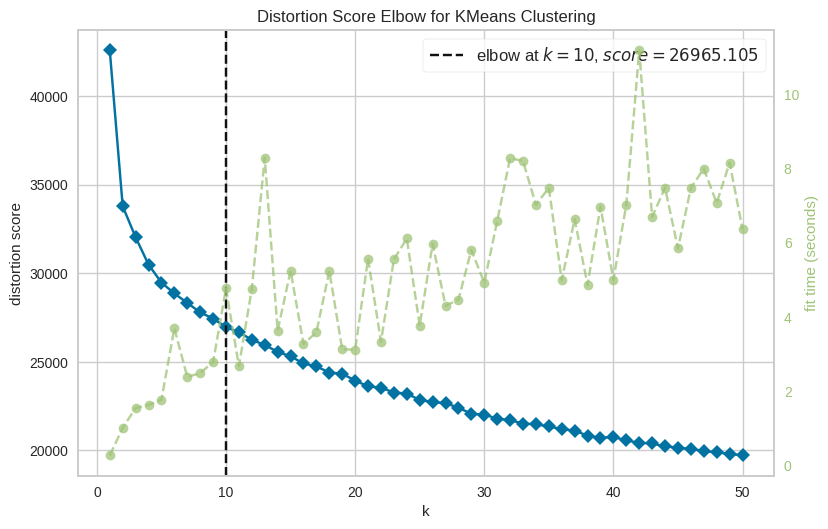

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [107]:
elb_visualizer = KElbowVisualizer(km, k=(1,51))
elb_visualizer.fit(X_std)    
elb_visualizer.show()

In [108]:
range_n_clusters = range(2,25)
sil=[]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X_std)
    silhouette_avg = silhouette_score(X_std, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sil.append(silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.3034539676141008
For n_clusters = 3 The average silhouette_score is : 0.29449076581817074
For n_clusters = 4 The average silhouette_score is : 0.11545090968417022
For n_clusters = 5 The average silhouette_score is : 0.12170058796045048
For n_clusters = 6 The average silhouette_score is : 0.12050537652132197
For n_clusters = 7 The average silhouette_score is : 0.11924846369343368
For n_clusters = 8 The average silhouette_score is : 0.11410155277700605
For n_clusters = 9 The average silhouette_score is : 0.11380498323361588
For n_clusters = 10 The average silhouette_score is : 0.08864085924212586
For n_clusters = 11 The average silhouette_score is : 0.11062472782746756
For n_clusters = 12 The average silhouette_score is : 0.09056443700721895
For n_clusters = 13 The average silhouette_score is : 0.0745909064308001
For n_clusters = 14 The average silhouette_score is : 0.07485035264604627
For n_clusters = 15 The average silhouette_score

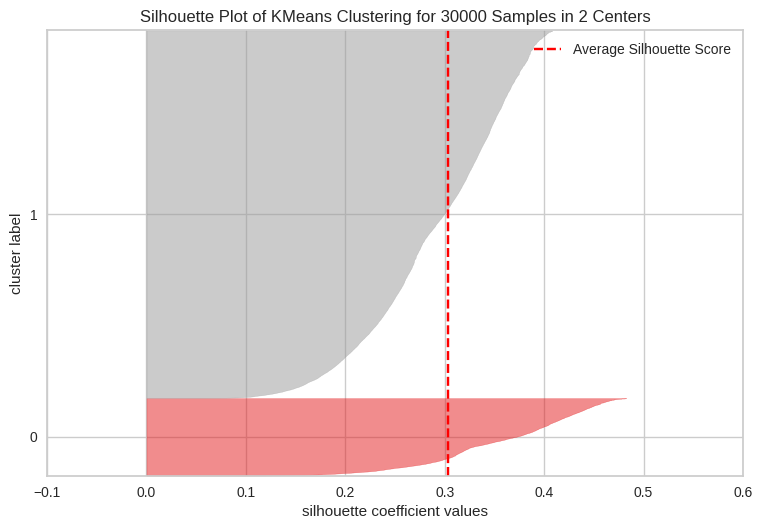

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 30000 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [109]:
model_2clust = KMeans(n_clusters = 2)

sil_visualizer = SilhouetteVisualizer(model_2clust)
sil_visualizer.fit(X_std)    
sil_visualizer.show()

## Model 4: K _Means Standardisation, No elimination, outliers clipped, Cust_ID dropped

In [110]:
range_n_clusters = range(2,15)
sil=[]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X_std)
    silhouette_avg = silhouette_score(X_std, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sil.append(silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.3034539676141008
For n_clusters = 3 The average silhouette_score is : 0.29404069216599277
For n_clusters = 4 The average silhouette_score is : 0.11558449184724356
For n_clusters = 5 The average silhouette_score is : 0.12191222895650933
For n_clusters = 6 The average silhouette_score is : 0.12104029879142436
For n_clusters = 7 The average silhouette_score is : 0.11637463942518259
For n_clusters = 8 The average silhouette_score is : 0.11679464038683766
For n_clusters = 9 The average silhouette_score is : 0.08989832570542793
For n_clusters = 10 The average silhouette_score is : 0.07156157257907714
For n_clusters = 11 The average silhouette_score is : 0.07091887580855925
For n_clusters = 12 The average silhouette_score is : 0.08609404940148657
For n_clusters = 13 The average silhouette_score is : 0.10979591306110928
For n_clusters = 14 The average silhouette_score is : 0.07738630084652141


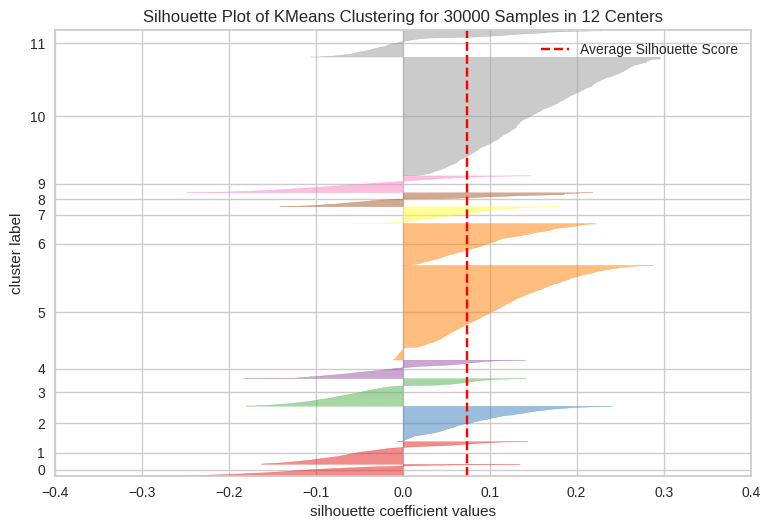

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 30000 Samples in 12 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [111]:
model_12clust = KMeans(n_clusters = 12)

sil_visualizer = SilhouetteVisualizer(model_12clust)
sil_visualizer.fit(X_std)    
sil_visualizer.show()

## Set of rules for elimination of data points.
## find the brand with minimum hit and check if it can be dropped
## order=0 and brand=1 0r 2 eliminate
## map each column with value upto median="1" and value above median="2" and 0="0"

In [112]:
#To see how many hits each brand has
brands=df.drop(columns=["Gender_0","Gender_1","Orders"])
cols=brands.columns
bran=[]
summ=[]
for col in cols:
    bran.append(col)
    summ.append(brands[col].sum())
total=pd.DataFrame(list(zip(bran,summ)),columns=["brand_name","sum_of_search"])

In [113]:
total

brand_name  sum_of_search
0                   Jordan           8023
1                 Gatorade           7570
2                  Samsung           6688
3                     Asus           4840
4                     Udis           4306
5   Mondelez International           4193
6                 Wrangler           3208
7                     Vans           3343
8                     Fila           2828
9                   Brooks           4204
10                     H&M           9846
11             Dairy Queen           6280
12                   Fendi           4244
13         Hewlett Packard           4833
14                  Pladis           3183
15                   Asics           9007
16                 Siemens           1442
17            J.M. Smucker          22644
18               Pop Chips           7437
19                 Juniper          14125
20                  Huawei           7740
21                  Compaq           3563
22                     IBM            959
23                Burberry          12841
24                      Mi           3640
25                      LG           3076
26                    Dior           8134
27                  Scabal          11102
28          Tommy Hilfiger           4769
29               Hollister           2330
30              Forever 21           1720
31                Colavita           5766
32               Microsoft           3491
33               Jiffy mix           2641
34                   Kraft           2127

In [114]:
#to see how many hits each customer has on a total.
df = df.assign(total_search=df[['Jordan', 'Gatorade', 'Samsung', 'Asus',
       'Udis', 'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks',
       'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics',
       'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq',
       'IBM', 'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger',
       'Hollister', 'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix',
       'Kraft']].sum(axis=1))
df.head()

Orders  Jordan  Gatorade  Samsung  Asus  Udis  Mondelez International  \
0       7       0         0        0     0     0                       0   
1       0       0         1        0     0     0                       0   
2       7       0         1        0     0     0                       0   
3       0       0         0        0     0     0                       0   
4      10       0         0        0     0     0                       0   

   Wrangler  Vans  Fila  ...  Tommy Hilfiger  Hollister  Forever 21  Colavita  \
0         0     2     0  ...               0          0           0         0   
1         0     0     0  ...               0          0           0         0   
2         0     0     0  ...               0          0           0         0   
3         0     0     0  ...               0          0           0         0   
4         0     0     0  ...               0          0           0         0   

   Microsoft  Jiffy mix  Kraft  Gender_0  Gender_1  total_search  
0          0          0      0         0         1             2  
1          0          0      0         1         0            18  
2          1          0      0         0         1             5  
3          0          0      0         1         0             2  
4          0          1      1         1         0            16  

[5 rows x 39 columns]

In [115]:
print("ori shape:",df.shape)

#delete rows in which order=0 and total_search=1
reduced_df = df.loc[(df["total_search"] >1) & (df["Orders"] > 0)]
print("new shape after deletion :",reduced_df.shape)

ori shape: (30000, 39)
new shape after deletion : (20303, 39)


In [116]:
#delete rows in which order=0 and total_search<2
reduced_df = reduced_df.loc[(reduced_df["total_search"] >2) & (reduced_df["Orders"] > 0)]
print("new shape after  further deletion :",reduced_df.shape)

new shape after  further deletion : (17654, 39)


In [117]:
reduced_df=reduced_df.drop(columns=["total_search"])
Q1 = reduced_df.quantile(0.25)
Q3 = reduced_df.quantile(0.75)
IQR = Q3 - Q1
((reduced_df < (Q1 - 1.5 * IQR)) | (reduced_df > (Q3 + 1.5 * IQR))).sum() # gives no. of outliers

Orders                       0
Jordan                    3616
Gatorade                  3753
Samsung                   2313
Asus                      1842
Udis                      1800
Mondelez International    2272
Wrangler                  1372
Vans                      1515
Fila                      1088
Brooks                    2437
H&M                        632
Dairy Queen               2315
Fendi                     2244
Hewlett Packard           2218
Pladis                    1467
Asics                     3255
Siemens                    659
J.M. Smucker              1554
Pop Chips                 3639
Juniper                    884
Huawei                    3181
Compaq                    1655
IBM                        407
Burberry                  1066
Mi                        1832
LG                        1326
Dior                      3946
Scabal                     572
Tommy Hilfiger            2625
Hollister                 1225
Forever 21                 978
Colavita

## Final Model

From all the above models, Model 2 is the best one, providing a value of K=2, and a silhoutte score of 0.68

Eventhough This is is an unsupervised earning model, the silhoutte score is purely for the quality of clusters formed by the model.

A score of approaching 1 (ie.,0.5 to 1), is a good score, as it indicates how dense the clusters are and how far are they apart from each other. A score of 0 to 0.5 denotes the clusters are close and overlapping exists.

A negative score indicates that the data points are wrongly assigned to clusters.

In [118]:
km = KMeans(n_clusters=2) # applying k = 2 from model 2
km.fit(X_mM) # fit the data - identify pattern, does everything
df['clusters'] = km.fit_predict(X_mM)

In [119]:
#if we want to view the cluster do the below steps
centroids = km.cluster_centers_ # final centroid points
centroids

array([[ 3.45165066e-01,  1.07201953e-02,  1.40662416e-02,
         8.35717467e-03,  1.13763158e-02,  1.18913091e-02,
         4.85993038e-03,  1.41747608e-02,  4.76228913e-03,
         6.01070842e-03,  1.06277074e-02,  2.11814244e-02,
         1.92410358e-03,  8.54476641e-03,  1.75720397e-02,
         4.43010860e-03,  4.38133046e-03,  4.20460966e-03,
         1.19284244e-02,  1.17096964e-02,  6.06550727e-03,
         6.11429494e-03,  3.81521242e-03,  2.67466007e-03,
         1.29430423e-02,  1.52644371e-02,  6.01764723e-03,
         2.46219765e-02,  3.93530918e-02,  2.18187505e-02,
         9.42144017e-03,  7.98087013e-03,  8.73208638e-03,
         8.46372935e-03,  1.13407055e-02,  4.48230285e-03,
         1.00000000e+00, -1.49880108e-14],
       [ 3.58483340e-01,  1.31494957e-02,  2.98991446e-02,
         7.78047293e-03,  5.40698853e-04,  2.47578924e-03,
         2.84157596e-03,  1.00004256e-03,  1.74143049e-02,
         7.58330142e-03,  1.66602834e-02,  4.24486148e-03,
         1.41

In [120]:
km.labels_ # measures how tight my groups are. 

array([1, 0, 1, ..., 1, 1, 0], dtype=int32)

In [121]:
km.inertia_

4245.061798586585

## Mapping all columns

In [122]:
def map_function(x):
   if 1 <= x <= (max(df['Orders']))//2: return 1
   elif (max(df['Orders']))//2 <= x <= max(df['Orders']): return 2
   elif x == 0 : return 0

print("Unique values before mapping: ",df['Orders'].unique())
df['Orders_']=df['Orders'].apply(map_function)
print("Unique values after mapping: ",df['Orders'].unique())

Unique values before mapping:  [ 7  0 10  4  6  9  1  8  5  3  2 11 12]
Unique values after mapping:  [ 7  0 10  4  6  9  1  8  5  3  2 11 12]


In [123]:
def map_function(x):
   if 1 <= x <= (max(df[col]))//2: return 1
   elif (max(df[col]))//2 <= x <= max(df[col]): return 2
   elif x == 0 : return 0

colu=['Gatorade','Asus']   
for col in colu:
  df[col]=df[col].apply(map_function)
  print("mapped ",col, df[col].unique())

mapped  Gatorade [0 1 2]
mapped  Asus [0 1 2]


In [124]:
colu=['Orders', 'Jordan']
for col in colu:
  print("before mapping", col,df[col].unique())
  df[col]=df[col].apply(map_function)
  print("mapped ",col, df[col].unique())

before mapping Orders [ 7  0 10  4  6  9  1  8  5  3  2 11 12]
mapped  Orders [2 0 1]
before mapping Jordan [ 0  2  1  3 12  4 22  6 11  9  5  7 24  8 13 10]
mapped  Jordan [0 1 2]


In [125]:
colu=['Samsung', 'Udis']
for col in colu:
  print("before mapping", col,df[col].unique())
  df[col]=df[col].apply(map_function)
  print("mapped ",col, df[col].unique())

before mapping Samsung [ 0  2  1  4  3  5  6  8  7  9 14 10 22 13 12 11 15 26 27 16]
mapped  Samsung [0 1 2]
before mapping Udis [ 0  5  1  2  4  3  6  8  9 11  7 14 10]
mapped  Udis [0 1 2]


In [126]:
colu=['Mondelez International', 'Wrangler', 'Vans']
for col in colu:
  print("before mapping", col,df[col].unique())
  df[col]=df[col].apply(map_function)
  print("mapped ",col, df[col].unique())

before mapping Mondelez International [ 0  1  3  2  5  4  7  8  6 10 31  9 12]
mapped  Mondelez International [0 1 2]
before mapping Wrangler [0 1 2 7 9 3 4 6 8 5]
mapped  Wrangler [0 1 2]
before mapping Vans [ 2  0  1  3  5  8  9  6 13  4 16  7 10 11 14 12]
mapped  Vans [1 0 2]


In [127]:
colu=['Fila', 'Brooks','H&M', 'Dairy Queen']
for col in colu:
  print("before mapping", col,df[col].unique())
  df[col]=df[col].apply(map_function)
  print("mapped ",col, df[col].unique())

before mapping Fila [ 0  1  3  2  7  4  9  6  5 10  8 13 11 12 15]
mapped  Fila [0 1 2]
before mapping Brooks [ 0  2  1  4  5  3  6  7 12  9]
mapped  Brooks [0 1 2]
before mapping H&M [ 0  1  2  3  4  8  6  5  7 13 18 15 14  9 10 11]
mapped  H&M [0 1 2]
before mapping Dairy Queen [  0   1   2   5   3  10   4   6   7   9  11 114  45  12  13  19  29  15
   8  16  21  17  24  14]
mapped  Dairy Queen [0 1 2]


In [128]:
colu=['Fendi', 'Hewlett Packard', 'Pladis', 'Asics']
for col in colu:
  print("before mapping", col,df[col].unique())
  df[col]=df[col].apply(map_function)
  print("mapped ",col, df[col].unique())

before mapping Fendi [ 0  1  2  3  5  6  4  7 12 18  9 10  8 11]
mapped  Fendi [0 1 2]
before mapping Hewlett Packard [ 0  1  2  3  5  4 10  7  6  9]
mapped  Hewlett Packard [0 1 2]
before mapping Pladis [ 0  5  1  2  3  4  6  8 26  9  7]
mapped  Pladis [0 1 2]
before mapping Asics [ 0  2  1  3  4  5 34  7  9 16 11 18  6 12  8 14 21 13 10 19 15 66 20 17
 27]
mapped  Asics [0 1 2]


In [129]:
colu=['Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei']
for col in colu:
  print("before mapping", col,df[col].unique())
  df[col]=df[col].apply(map_function)
  print("mapped ",col, df[col].unique())

before mapping Siemens [ 0  1  2  3  4  7  6 11  5  8  9]
mapped  Siemens [0 1 2]
before mapping J.M. Smucker [ 0  2  1  3  4  9  5  6 22  8 25 13  7 21 10 20 17 12 11 64 15 27 18 14
 23 19 16]
mapped  J.M. Smucker [0 1 2]
before mapping Pop Chips [ 0  2  1  3  6  5  4 12  7 15  8  9 10 13 11 21 18]
mapped  Pop Chips [0 1 2]
before mapping Juniper [ 0  1  6  2  5  7  4  3 11 79  9 10 18  8 15 13 27 17 12 14 22 37 20 26
 39 16 23 52 36]
mapped  Juniper [0 1 2]
before mapping Huawei [ 0  1  2  8  4 10  3  5  9  6 12 44  7 11 16 17]
mapped  Huawei [0 1 2]


In [130]:
colu=['Compaq','IBM', 'Burberry', 'Mi', 'LG']
for col in colu:
  print("before mapping", col,df[col].unique())
  df[col]=df[col].apply(map_function)
  print("mapped ",col, df[col].unique())

before mapping Compaq [ 0  2  3  1  4 16  9  5  8  7 11  6 23 10 13 15 30 14 29]
mapped  Compaq [0 1 2]
before mapping IBM [ 0  2  1  3  8  4  5  6 11]
mapped  IBM [0 1 2]
before mapping Burberry [ 0  6  1  2  8  5  3  4 10  7  9 13 11 27 12 21 19 37 18 23 16]
mapped  Burberry [0 1 2]
before mapping Mi [0 4 1 2 3 6 5 7 9]
mapped  Mi [0 1 2]
before mapping LG [ 0  1  2  4  5  3  7 10  6 19  8 16 13]
mapped  LG [0 1 2]


In [131]:
colu=['Dior','Scabal', 'Tommy Hilfiger','Hollister']
for col in colu:
  print("before mapping", col,df[col].unique())
  df[col]=df[col].apply(map_function)
  print("mapped ",col, df[col].unique())

before mapping Dior [ 0  1  2  4  5  3  6  7 11  8  9 12]
mapped  Dior [0 1 2]
before mapping Scabal [ 0  2  1  3  4  6  5  8  7  9 11]
mapped  Scabal [0 1 2]
before mapping Tommy Hilfiger [0 1 2 3 5 4 7 6 8]
mapped  Tommy Hilfiger [0 1 2]
before mapping Hollister [0 2 1 3 4 7 5 9 8 6]
mapped  Hollister [0 1 2]


In [132]:
colu=['Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix','Kraft']
for col in colu:
  print("before mapping", col,df[col].unique())
  df[col]=df[col].apply(map_function)
  print("mapped ",col, df[col].unique())

before mapping Forever 21 [0 1 2 3 4 5 6 7 8]
mapped  Forever 21 [0 1 2]
before mapping Colavita [ 0  2  1  5  3  6  4  8 10 11  7 14  9 22 16]
mapped  Colavita [0 1 2]
before mapping Microsoft [ 0  1  2  3  4  6  7 14  5  9  8 11 12]
mapped  Microsoft [0 1 2]
before mapping Jiffy mix [0 1 2 5 3 4 7 6 8]
mapped  Jiffy mix [0 1 2]
before mapping Kraft [ 0  1  2  3  4 16  5  6  7 11  8 10]
mapped  Kraft [0 1 2]


In [133]:
df.to_csv('cust_mapped.csv') 

## Working with mapped df

In [134]:
df1 = pd.read_csv("/content/cust_mapped.csv")
df1.head()

Unnamed: 0  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0           0       2       0         0        0     0     0   
1           1       0       0         1        0     0     0   
2           2       2       0         1        0     0     0   
3           3       0       0         0        0     0     0   
4           4       2       0         0        0     0     0   

   Mondelez International  Wrangler  Vans  ...  Forever 21  Colavita  \
0                       0         0     1  ...           0         0   
1                       0         0     0  ...           0         0   
2                       0         0     0  ...           0         0   
3                       0         0     0  ...           0         0   
4                       0         0     0  ...           0         0   

   Microsoft  Jiffy mix  Kraft  Gender_0  Gender_1  total_search  clusters  \
0          0          0      0         0         1             2         1   
1          0          0      0         1         0            18         0   
2          1          0      0         0         1             5         1   
3          0          0      0         1         0             2         0   
4          0          1      1         1         0            16         0   

   Orders_  
0        2  
1        0  
2        2  
3        0  
4        2  

[5 rows x 42 columns]

In [135]:
#drop unwaned columns
df1.drop(columns=["Orders_"], inplace=True)

In [138]:
df1

Unnamed: 0  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0               0       2       0         0        0     0     0   
1               1       0       0         1        0     0     0   
2               2       2       0         1        0     0     0   
3               3       0       0         0        0     0     0   
4               4       2       0         0        0     0     0   
...           ...     ...     ...       ...      ...   ...   ...   
29995       29995       0       0         0        0     0     0   
29996       29996       1       0         1        0     0     0   
29997       29997       0       0         1        0     0     0   
29998       29998       0       0         0        0     0     0   
29999       29999       1       1         0        0     1     0   

       Mondelez International  Wrangler  Vans  ...  Hollister  Forever 21  \
0                           0         0     1  ...          0           0   
1                           0         0     0  ...          0           0   
2                           0         0     0  ...          0           0   
3                           0         0     0  ...          0           0   
4                           0         0     0  ...          0           0   
...                       ...       ...   ...  ...        ...         ...   
29995                       0         0     0  ...          0           0   
29996                       0         0     0  ...          0           0   
29997                       0         0     1  ...          0           0   
29998                       0         0     0  ...          0           0   
29999                       0         0     0  ...          0           0   

       Colavita  Microsoft  Jiffy mix  Kraft  Gender_0  Gender_1  \
0             0          0          0      0         0         1   
1             0          0          0      0         1         0   
2             0          1          0      0         0         1   
3             0          0          0      0         1         0   
4             0          0          1      1         1         0   
...         ...        ...        ...    ...       ...       ...   
29995         0          0          0      0         0         1   
29996         0          0          0      0         0         1   
29997         0          0          0      0         0         1   
29998         0          0          0      0         0         1   
29999         0          0          0      0         1         0   

       total_search  clusters  
0                 2         1  
1                18         0  
2                 5         1  
3                 2         0  
4                16         0  
...             ...       ...  
29995             1         1  
29996             1         1  
29997             2         1  
29998             1         1  
29999             5         0  

[30000 rows x 41 columns]

In [139]:
#fillna "Gender"
# df1["Gender"] = df1["Gender"].fillna(value="M",limit=545)
# df1["Gender"] = df1["Gender"].fillna(value="F",limit=2179)
# #encode "Gender"
# df1 = pd.get_dummies(df1, prefix=['Gender'], columns=['Gender'])

In [140]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).sum() # gives no. of outliers

Unnamed: 0                   0
Orders                       0
Jordan                    4812
Gatorade                  4950
Samsung                   3100
Asus                      2403
Udis                      2412
Mondelez International    3083
Wrangler                  1836
Vans                      2015
Fila                      1590
Brooks                    3300
H&M                       6244
Dairy Queen               3197
Fendi                     3069
Hewlett Packard           2967
Pladis                    1949
Asics                     4414
Siemens                    923
J.M. Smucker                 0
Pop Chips                 5040
Juniper                      0
Huawei                    4334
Compaq                    2347
IBM                        616
Burberry                  6880
Mi                        2460
LG                        1938
Dior                      5409
Scabal                       0
Tommy Hilfiger            3520
Hollister                 1676
Forever 

## Standardisation, no outlier clipping, no dropping cust_ID,

In [144]:
scaler = StandardScaler()
X_std = scaler.fit_transform(df1) # standardise data

Text(0, 0.5, 'Inertia')

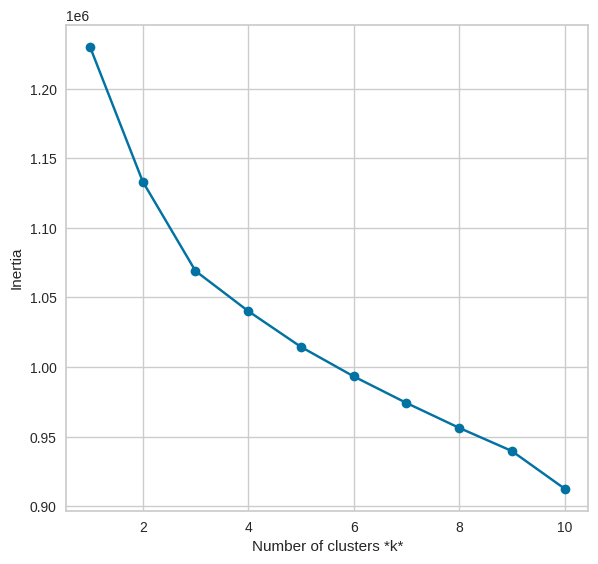

In [145]:
# Elbow plot
# We make a plot between k value and inertia
inertias = []  # storer inertia for all values of k 
list_k = list(range(1, 11))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_std)
    inertias.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Inertia')

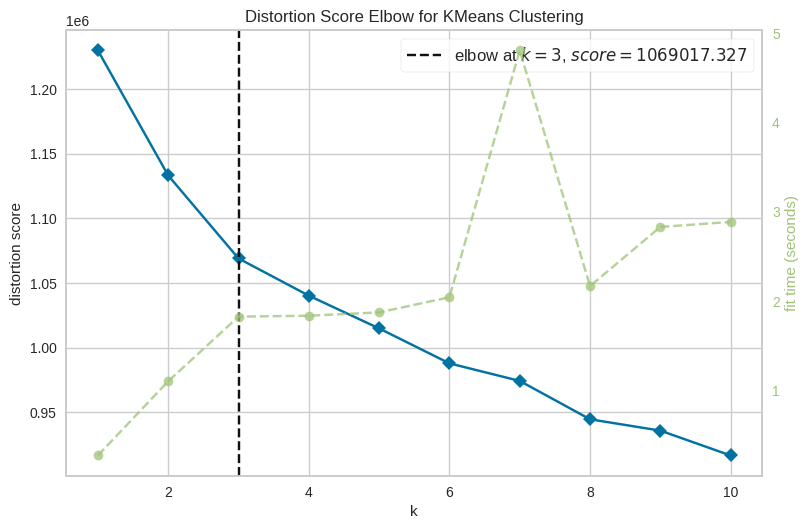

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [146]:
elb_visualizer = KElbowVisualizer(km, k=(1,11))
elb_visualizer.fit(X_std)    
elb_visualizer.show()

In [147]:
range_n_clusters = range(2,15)
sil=[]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X_std)
    silhouette_avg = silhouette_score(X_std, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sil.append(silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.11249116900525954
For n_clusters = 3 The average silhouette_score is : 0.1189115952772397
For n_clusters = 4 The average silhouette_score is : 0.10530342034681482
For n_clusters = 5 The average silhouette_score is : 0.10958765240532702
For n_clusters = 6 The average silhouette_score is : 0.12795297490065996
For n_clusters = 7 The average silhouette_score is : 0.10550546537171052
For n_clusters = 8 The average silhouette_score is : 0.08617328821466085
For n_clusters = 9 The average silhouette_score is : 0.08450291971699742
For n_clusters = 10 The average silhouette_score is : 0.07287894672228722
For n_clusters = 11 The average silhouette_score is : 0.0751536532706056
For n_clusters = 12 The average silhouette_score is : 0.08472615996725645
For n_clusters = 13 The average silhouette_score is : 0.06010133290172283
For n_clusters = 14 The average silhouette_score is : 0.08487341408163114


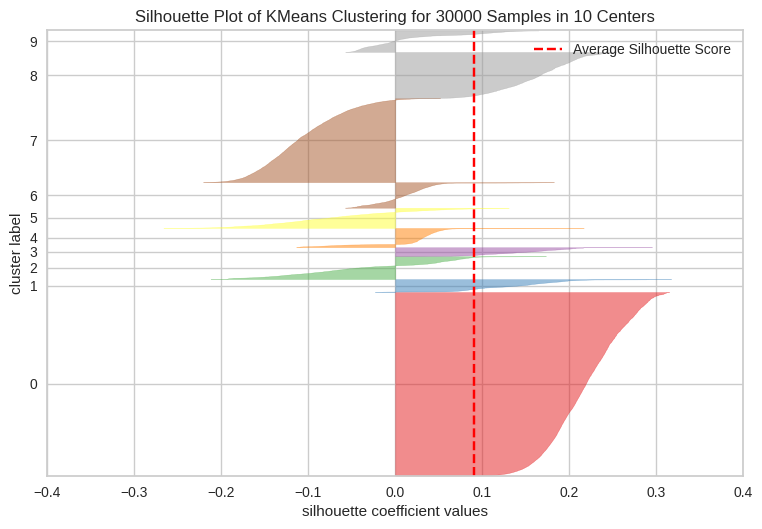

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 30000 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [148]:
model_10clust = KMeans(n_clusters = 10)

sil_visualizer = SilhouetteVisualizer(model_10clust)
sil_visualizer.fit(X_std)    
sil_visualizer.show()

## Min max normalisation, no outlier clipping, no cust_ID dropping

In [149]:
X_mM = scaler.fit_transform(df1) # standardise data

Text(0, 0.5, 'Inertia')

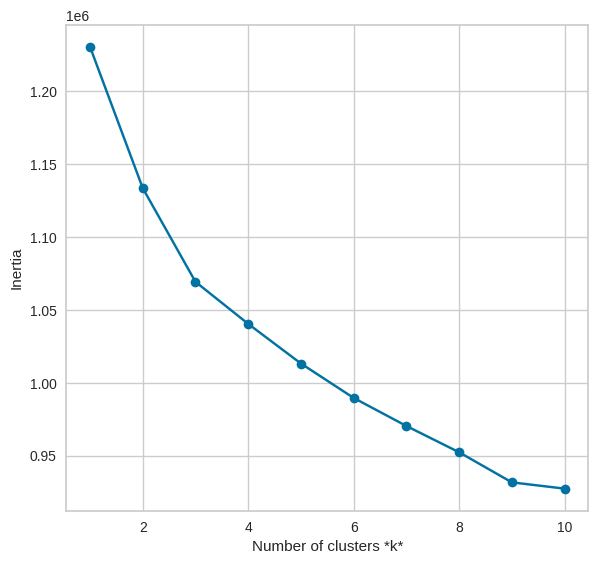

In [150]:
# Elbow plot
# We make a plot between k value and inertia
inertias = []  # storer inertia for all values of k 
list_k = list(range(1, 11))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_mM)
    inertias.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Inertia')

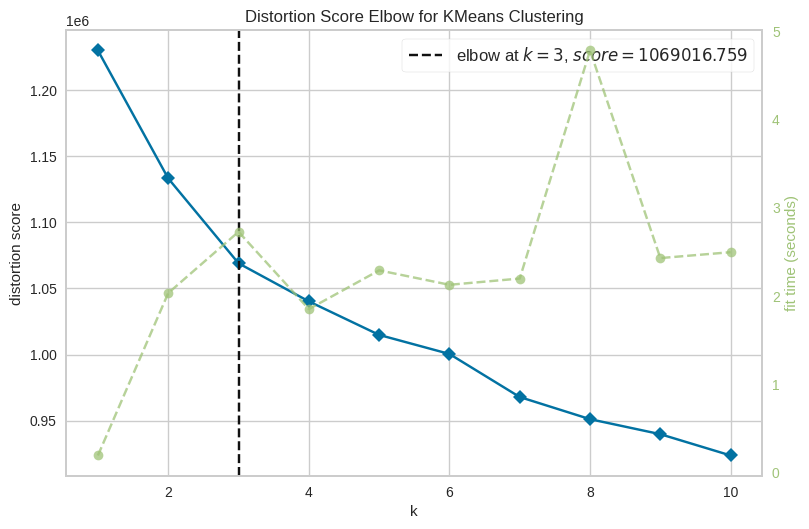

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [151]:
km = KMeans(random_state=42)

elb_visualizer = KElbowVisualizer(km, k=(1,11))
elb_visualizer.fit(X_mM)    
elb_visualizer.show()

In [152]:
range_n_clusters = range(2,15)
sil=[]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X_mM)
    silhouette_avg = silhouette_score(X_mM, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sil.append(silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.11249116900525954
For n_clusters = 3 The average silhouette_score is : 0.11906261948643335
For n_clusters = 4 The average silhouette_score is : 0.10579408498712393
For n_clusters = 5 The average silhouette_score is : 0.10986676326026414
For n_clusters = 6 The average silhouette_score is : 0.10640502184706097
For n_clusters = 7 The average silhouette_score is : 0.09201422753818657
For n_clusters = 8 The average silhouette_score is : 0.06728284389862776
For n_clusters = 9 The average silhouette_score is : 0.0757544895766425
For n_clusters = 10 The average silhouette_score is : 0.07451707717394025
For n_clusters = 11 The average silhouette_score is : 0.0953311762620683
For n_clusters = 12 The average silhouette_score is : 0.04743362879962072
For n_clusters = 13 The average silhouette_score is : 0.08868710655424934
For n_clusters = 14 The average silhouette_score is : 0.09085247936598388


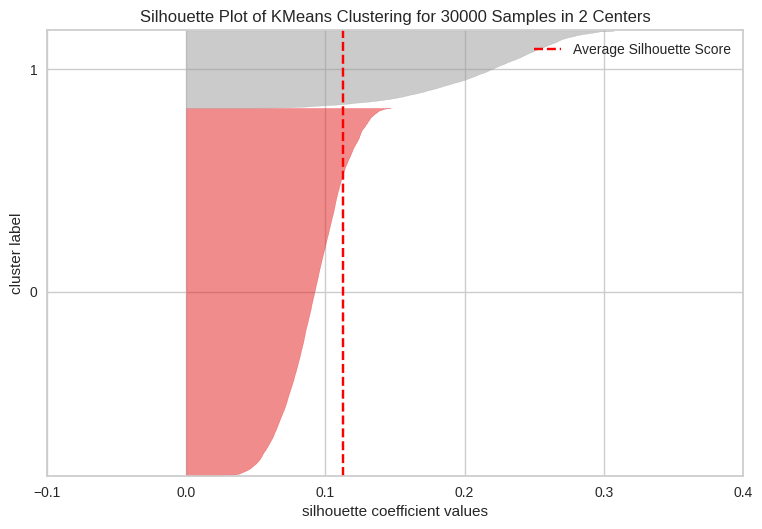

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 30000 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [153]:
model_2clust = KMeans(n_clusters = 2)

sil_visualizer = SilhouetteVisualizer(model_2clust)
sil_visualizer.fit(X_mM)    
sil_visualizer.show()

## Min max , dropping Cust_ID, no outlier treatment

In [157]:
df1=pd.read_csv("/content/cust_mapped.csv")
#drop unwaned columns
df1 = df1.drop('Unnamed: 0', axis=1)
#df1.drop(columns=['Unnamed: 0',"Orders_","Cust_ID"], inplace=True)

#fillna "Gender"
# df1["Gender"]=df1["Gender"].fillna(value="M",limit=545)
# df1["Gender"]=df1["Gender"].fillna(value="F",limit=2179)
# #encode "Gender"
# df1= pd.get_dummies(df1, prefix=['Gender'], columns=['Gender'])

df1.columns

Index(['Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft', 'Gender_0',
       'Gender_1', 'total_search', 'clusters', 'Orders_'],
      dtype='object')

In [158]:
X_mM = scaler.fit_transform(df1) # standardise data

Text(0, 0.5, 'Inertia')

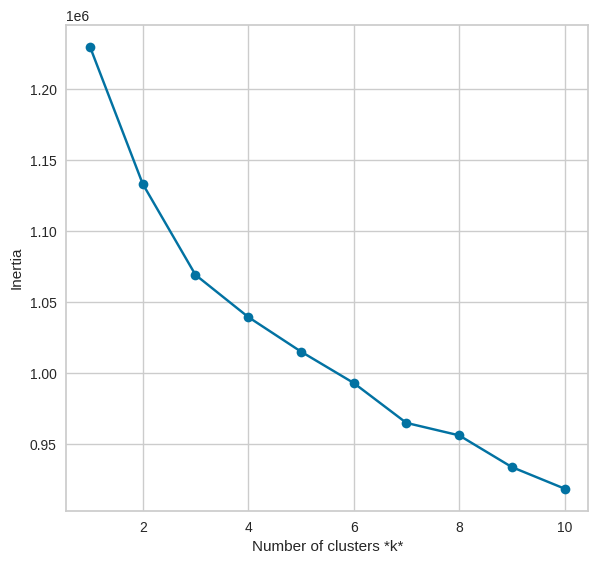

In [159]:
# Elbow plot
# We make a plot between k value and inertia
inertias = []  # storer inertia for all values of k 
list_k = list(range(1, 11))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_mM)
    inertias.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Inertia')

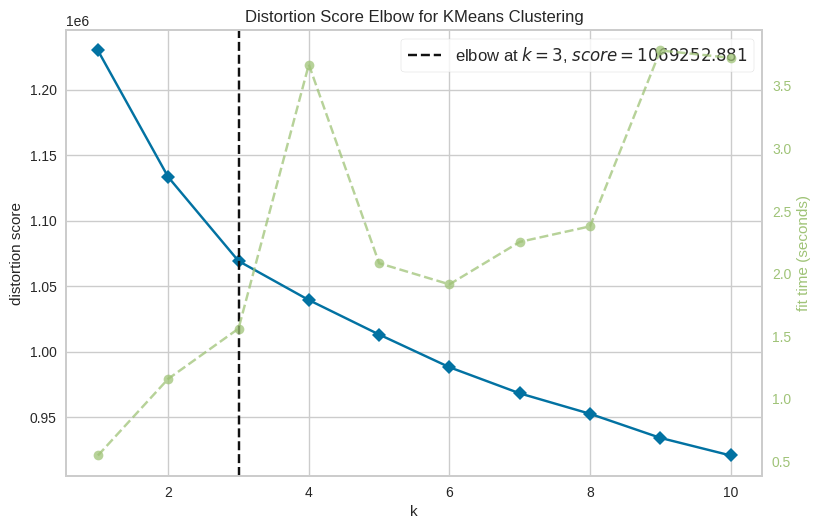

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [160]:
elb_visualizer = KElbowVisualizer(km, k=(1,11))
elb_visualizer.fit(X_mM)    
elb_visualizer.show()

In [161]:
range_n_clusters = range(2,15)
sil=[]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X_mM)
    silhouette_avg = silhouette_score(X_mM, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sil.append(silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.18535637411112188
For n_clusters = 3 The average silhouette_score is : 0.11893745175585313
For n_clusters = 4 The average silhouette_score is : 0.10439313405456296
For n_clusters = 5 The average silhouette_score is : 0.06682057710240129
For n_clusters = 6 The average silhouette_score is : 0.04767465435681444
For n_clusters = 7 The average silhouette_score is : 0.12037563258111733
For n_clusters = 8 The average silhouette_score is : 0.04941204746666364
For n_clusters = 9 The average silhouette_score is : 0.046724120176407424
For n_clusters = 10 The average silhouette_score is : 0.05005078443185975
For n_clusters = 11 The average silhouette_score is : 0.07265840724592385
For n_clusters = 12 The average silhouette_score is : 0.0724268280700574
For n_clusters = 13 The average silhouette_score is : 0.05961148217832688
For n_clusters = 14 The average silhouette_score is : 0.0644321576599798


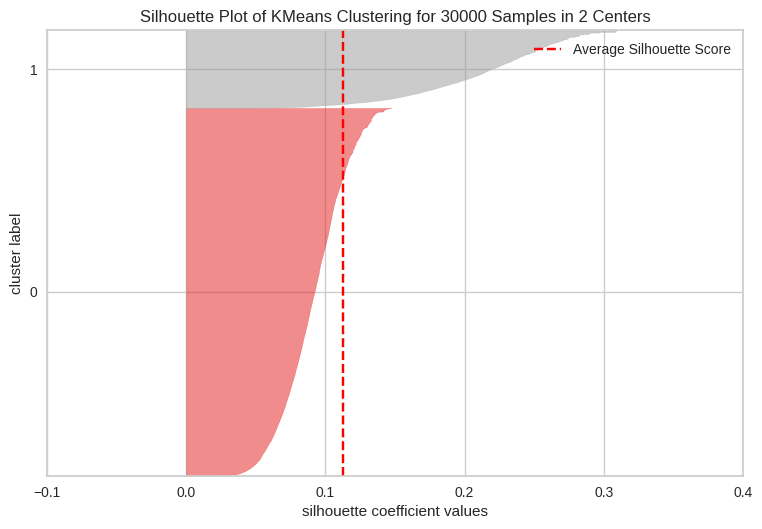

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 30000 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [162]:
model_2clust = KMeans(n_clusters = 2)

sil_visualizer = SilhouetteVisualizer(model_2clust)
sil_visualizer.fit(X_mM)    
sil_visualizer.show()